# <div style='padding:25px;background-color:maroon;color:white;border-radius:4px;font-size:100%;text-align: center'> Insurance Analytics and Prediction<br></div>

# <div style='padding:5px;background-color:maroon;color:white;border-radius:2px;font-size:100%;text-align: center'>Classification Model Training<br></div>
### <span style="color:Khaki;">Problem Statement for Customer Segmentation (Clustering):
<span style="color: Chartreuse;">   &#9784; &nbsp;</span> Utilize clustering algorithms to group customers based on their banking behaviors, transaction histories, and demographics. <br>
- Apply clustering algorithms to group policyholders based on similar characteristics and behavior.
- Identify customer segments with common insurance needs and preferences.
- Tailor marketing strategies and product offerings to specific clusters, enhancing customer
engagement and increasing cross-selling opportunities.


## <span style="color:Aqua;">Importing libraries from Python</span>

In [2]:
import pandas as pd
pd.options.display.max_columns = None
pd.set_option("display.precision", 4)
pd.set_option('display.float_format', '{:.4f}'.format)

import numpy as np

import seaborn as sns
sns.set_theme(context='notebook', style='white', palette='dark', font='sans-serif', font_scale=1, color_codes=True, rc=None)
sns.set_style({'axes.facecolor': 'white','axes.edgecolor': 'white'})

import matplotlib.pyplot as plt
plt.rcParams.update({
    'text.color': 'black',  # Change font color
    'axes.labelcolor': 'black',  # Change axis label color
    'xtick.color': 'black',  # Change x-tick color
    'ytick.color': 'black',  # Change y-tick color
    'font.weight': 'bold',  # Change font weight
    'axes.titleweight': 'bold',  # Change title weight
    'axes.labelweight': 'bold',# Change label weight
})

from imblearn.combine import SMOTETomek

from sklearn.preprocessing import StandardScaler, RobustScaler,MinMaxScaler, label_binarize, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix, classification_report,precision_score, recall_score, f1_score, auc, roc_auc_score, roc_curve, balanced_accuracy_score
import xgboost as xg

from sklearn import svm

import pickle
import os




## <span style="color:Aqua;">Reading model dataset:</span>

In [3]:
df = pd.read_feather('transfered_data.feather')
df.sample(3)

months_as_customer policy_bind_date policy_state  policy_deductable  \
957                 205       2008-02-03           IL               2000   
490                 191       2008-02-25           OH               2000   
813                 282       1991-03-10           OH               2000   

    insured_sex insured_education_level insured_occupation insured_hobbies  \
957      FEMALE             High School    priv-house-serv       skydiving   
490        MALE             High School       armed-forces          movies   
813      FEMALE                      MD     prof-specialty     video-games   

    insured_relationship incident_date             incident_type  \
957       other-relative    2015-01-18  Single Vehicle Collision   
490            unmarried    2015-02-21             Vehicle Theft   
813              husband    2015-02-09             Vehicle Theft   

     collision_type incident_severity authorities_contacted incident_state  \
957  Rear Collision      Minor Damage                Police             WV   
490          Others      Minor Damage             Ambulance             WV   
813          Others      Minor Damage             Ambulance             WV   

    incident_city incident_hour_of_the_day number_of_vehicles_involved  \
957      Columbus                       19                           1   
490     Arlington                        3                           1   
813   Springfield                        7                           1   

    property_damage bodily_injuries witnesses police_report_available  \
957              NO               2         1                      NO   
490             YES               1         1                      NO   
813             YES               1         2                      NO   

     auto_make auto_year fraud_reported  age_boxcox  \
957  Chevrolet      1995              N      4.3172   
490     Toyota      2005              N      4.0005   
813     Accura      2013              N      4.4951   

     policy_annual_premium_boxcox  total_claim_amount_boxcox  \
957                     1391.6492                184336.2619   
490                     1556.2430                  3687.2079   
813                     1426.6538                  5961.0381   

     injury_claim_cube  property_claim_cube  vehicle_claim_boxcox  
957              15552                15552           130500.0347  
490              27432                27432             3085.2032  
813                  0                    0             4665.8295

In [4]:
ordinal = ['insured_education_level','incident_severity',]

nominal = ['policy_state','insured_sex','insured_occupation','insured_hobbies','insured_relationship','incident_type',
           'collision_type','authorities_contacted','incident_state','incident_city','property_damage',
           'police_report_available','auto_make','fraud_reported']

discrete = ['months_as_customer','incident_hour_of_the_day','number_of_vehicles_involved','auto_year'
            ,'witnesses','bodily_injuries']
continuous = [
    'age_boxcox','policy_annual_premium_boxcox','total_claim_amount_boxcox','injury_claim_cube',
    'property_claim_cube','vehicle_claim_boxcox','insurance_age','vehicle_age','auto_year','policy_deductable']

date = ['policy_bind_date','incident_date']

len(ordinal + nominal + discrete +continuous + date)

34

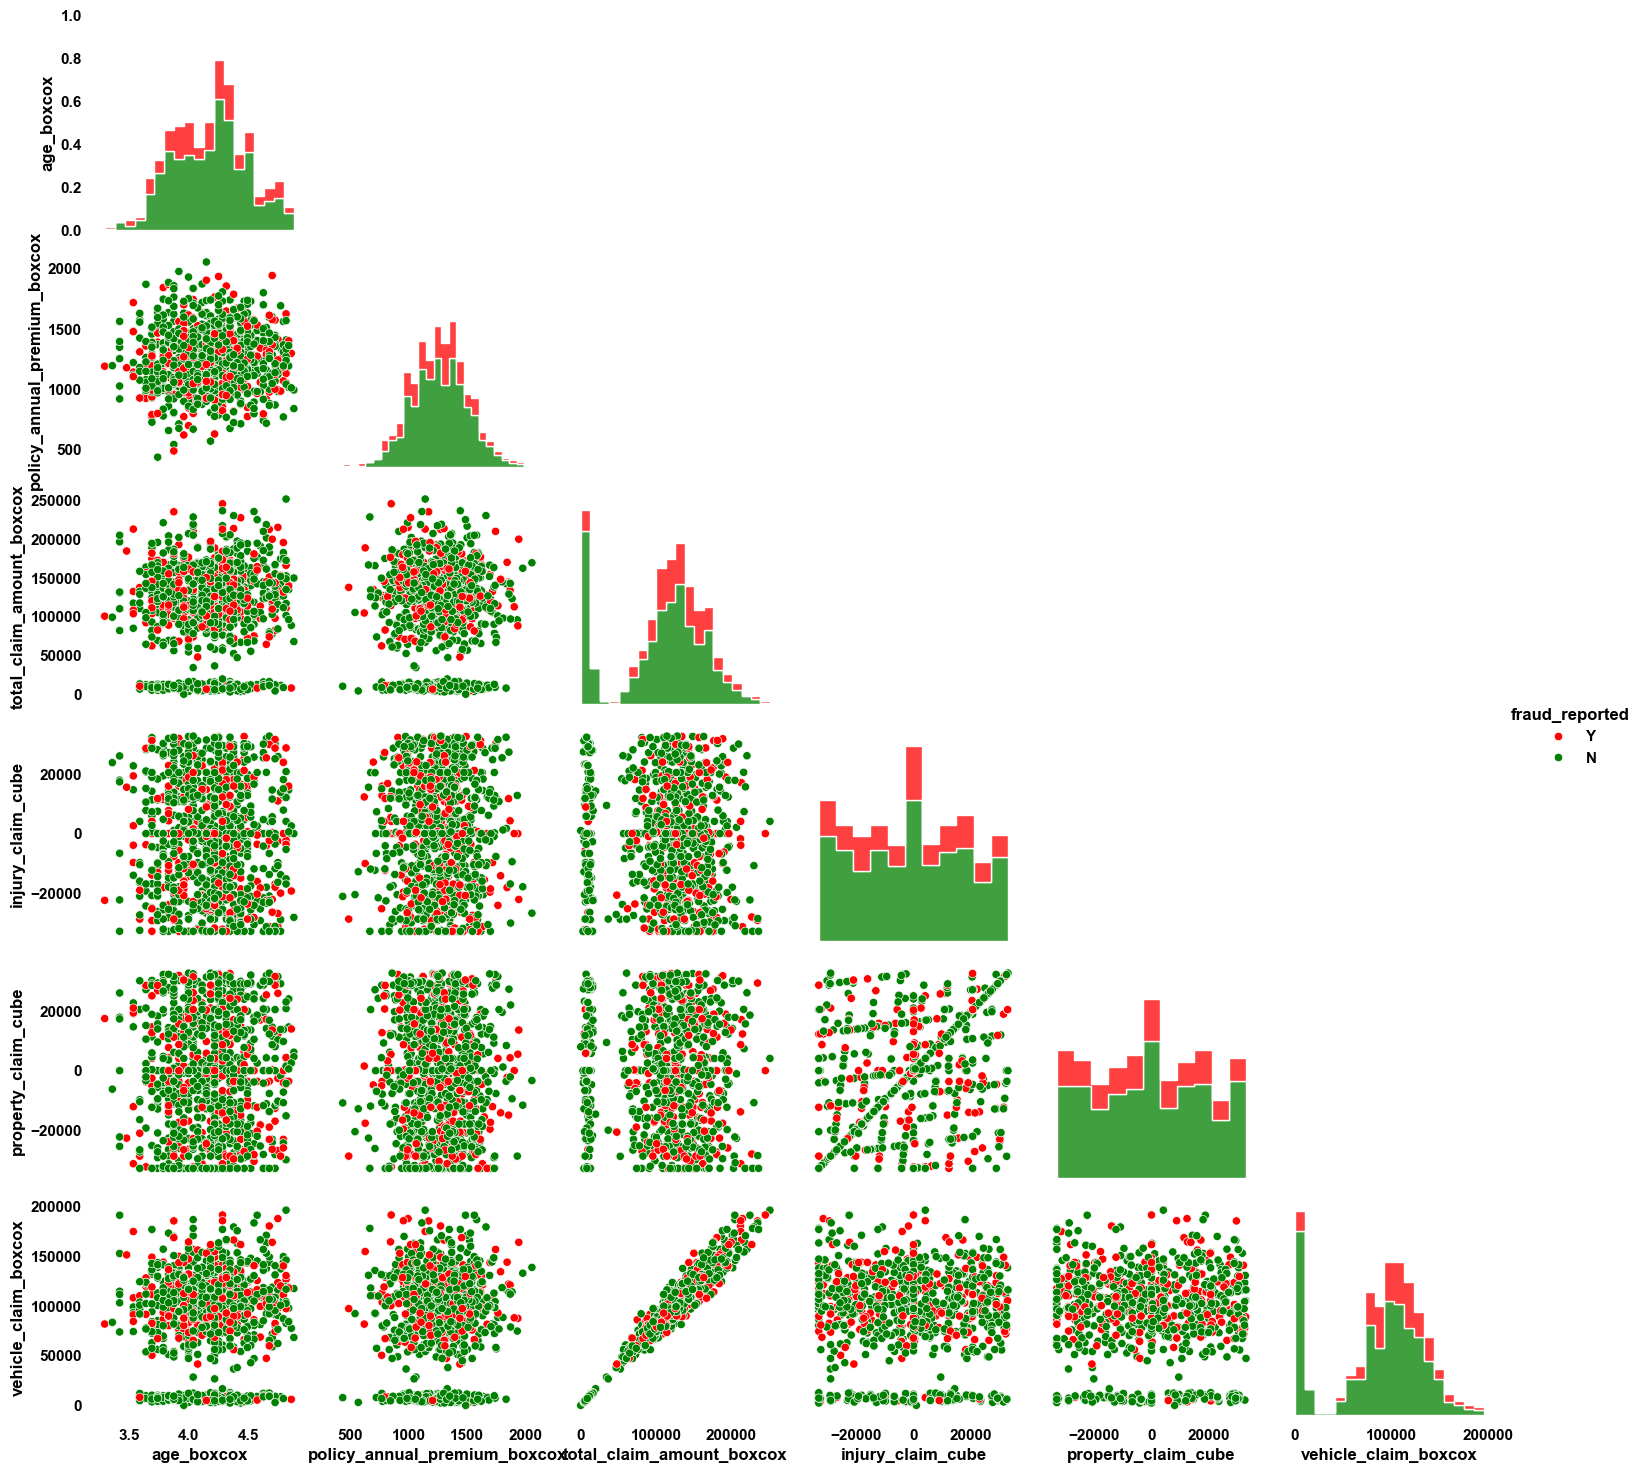

In [5]:
grid = sns.PairGrid(df,vars = [
    'age_boxcox','policy_annual_premium_boxcox','total_claim_amount_boxcox','injury_claim_cube',
    'property_claim_cube','vehicle_claim_boxcox',] , hue='fraud_reported',hue_order=['Y','N'],palette=['red','green'])
grid = grid.map_lower(sns.scatterplot)
grid = grid.map_diag(sns.histplot,multiple="stack",element='step')

grid.add_legend()

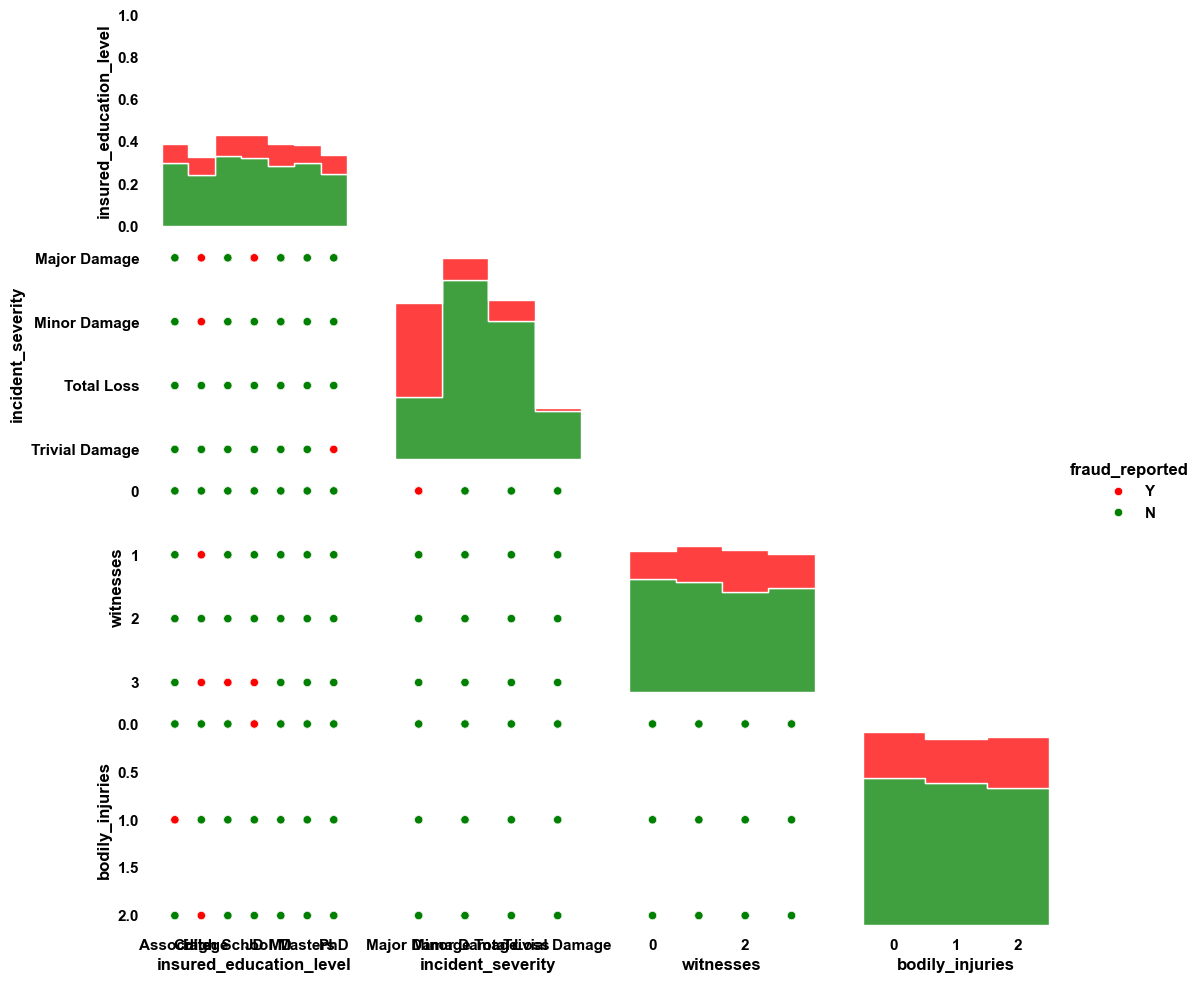

In [6]:
grid = sns.PairGrid(df,vars = ['insured_education_level','incident_severity','witnesses','bodily_injuries',] , 
                    hue='fraud_reported',hue_order=['Y','N'],palette=['red','green'])
grid = grid.map_lower(sns.scatterplot)
grid = grid.map_diag(sns.histplot,multiple="stack",element="step")

grid.add_legend()

In [ ]:
grid = sns.PairGrid(df,vars = ['policy_state','insured_sex','insured_occupation','insured_hobbies','insured_relationship','incident_type',
           'collision_type','authorities_contacted','incident_state','incident_city','property_damage',
           'police_report_available','auto_make','fraud_reported'], 
                    hue='fraud_reported',hue_order=['Y','N'],palette=['red','green'])
grid = grid.map_lower(sns.scatterplot)
grid = grid.map_diag(sns.histplot,multiple="stack",element="step")

grid.add_legend()

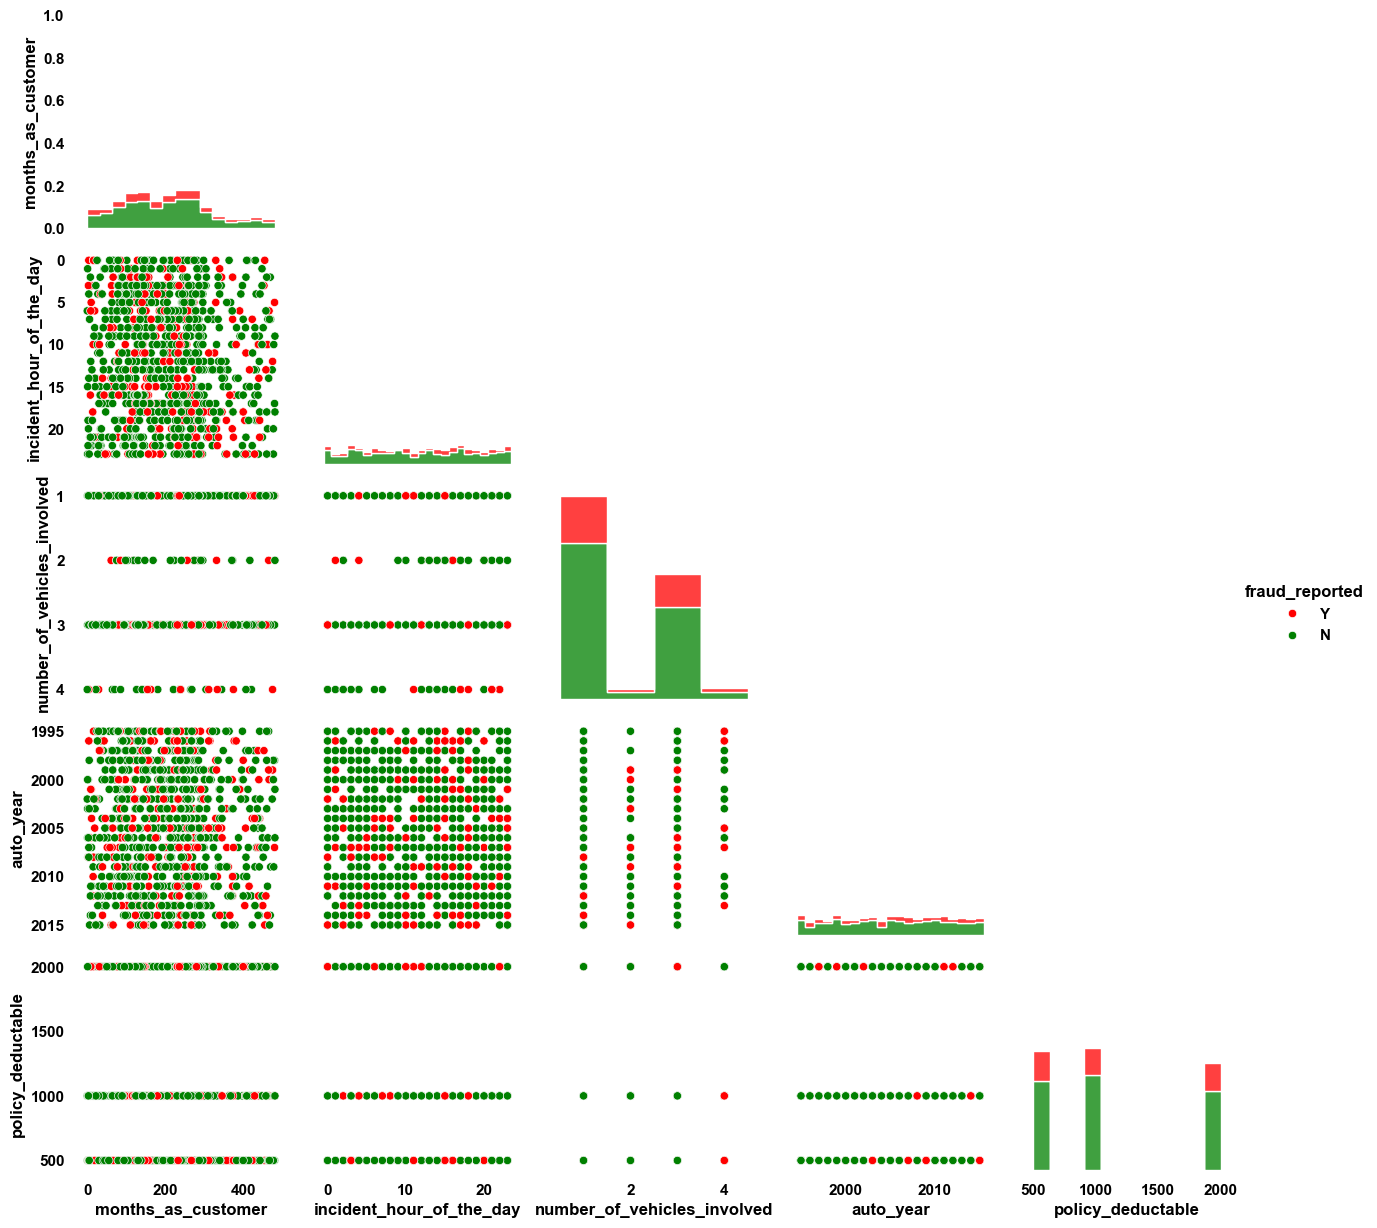

In [153]:
grid = sns.PairGrid(df,vars = ['months_as_customer','incident_hour_of_the_day','number_of_vehicles_involved','auto_year','policy_deductable'], 
                    hue='fraud_reported',hue_order=['Y','N'],palette=['red','green'])
grid = grid.map_lower(sns.scatterplot)
grid = grid.map_diag(sns.histplot,multiple="stack",element="step")

grid.add_legend()

In [154]:
df['insurance_age'] = pd.to_numeric((df.incident_date.dt.year - df.policy_bind_date.dt.year),errors='raise',downcast='integer')
df['vehicle_age'] = pd.to_numeric((df.incident_date.dt.year - df.auto_year.astype(int)),errors='raise',downcast='integer')

In [155]:
df.insurance_age.value_counts()

insurance_age
24    55
13    50
23    48
25    48
18    44
1     43
6     43
19    43
9     41
14    41
21    41
16    40
10    40
8     40
20    39
5     38
12    37
3     36
11    36
2     35
22    33
7     33
4     32
15    31
17    30
0      3
Name: count, dtype: int64

In [156]:
df.vehicle_age.value_counts()

vehicle_age
20    56
16    55
10    54
9     53
4     53
8     52
12    51
6     50
5     50
2     49
13    49
0     47
18    46
3     46
7     45
1     44
14    42
15    42
17    40
11    39
19    37
Name: count, dtype: int64

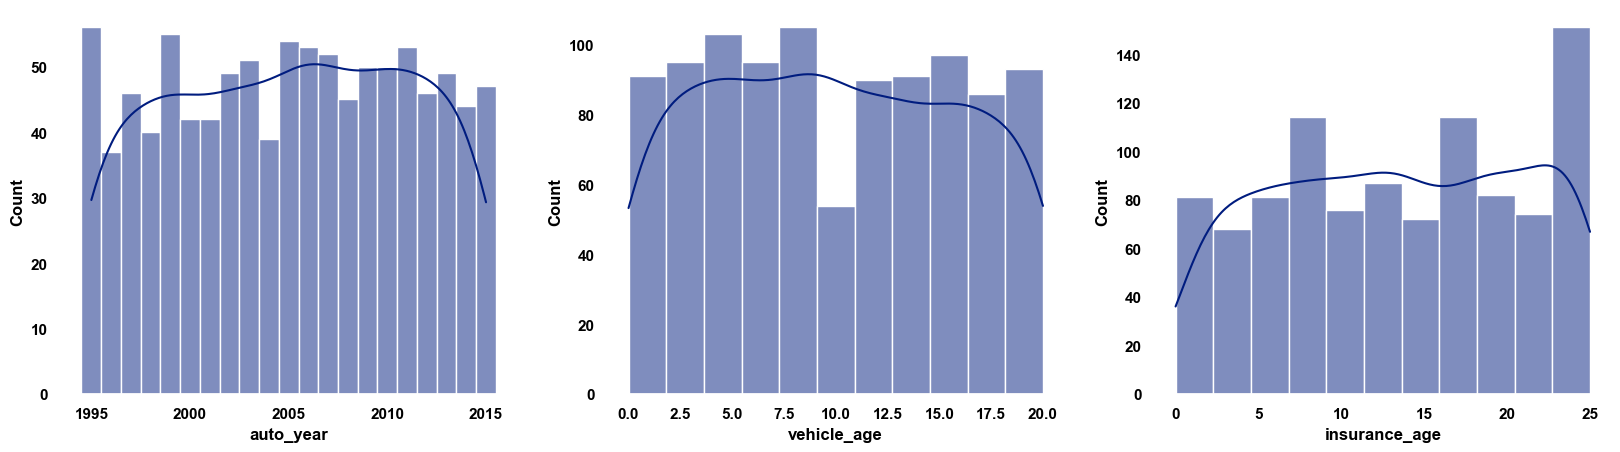

In [157]:
fig, axes = plt.subplots(ncols=3, nrows = 1, figsize=(20, 5))
for i, col in enumerate(['auto_year','vehicle_age','insurance_age']):
    sns.histplot(data=df,x=col,kde=True,ax=axes[i])
plt.show()


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   months_as_customer            1000 non-null   int16         
 1   policy_bind_date              1000 non-null   datetime64[ns]
 2   policy_state                  1000 non-null   category      
 3   policy_deductable             1000 non-null   int16         
 4   insured_sex                   1000 non-null   category      
 5   insured_education_level       1000 non-null   category      
 6   insured_occupation            1000 non-null   category      
 7   insured_hobbies               1000 non-null   category      
 8   insured_relationship          1000 non-null   category      
 9   incident_date                 1000 non-null   datetime64[ns]
 10  incident_type                 1000 non-null   category      
 11  collision_type                1

## <span style="color:Aqua;"> Encoding Categorical Features:</span> 

In [159]:
df.sample(2)

months_as_customer policy_bind_date policy_state  policy_deductable  \
507                  86       2014-08-30           IL               2000   
50                  430       2004-01-10           OH               2000   

    insured_sex insured_education_level insured_occupation insured_hobbies  \
507        MALE             High School     prof-specialty        yachting   
50         MALE                      MD      other-service  bungie-jumping   

    insured_relationship incident_date             incident_type  \
507              husband    2015-01-30  Single Vehicle Collision   
50             own-child    2015-01-03   Multi-vehicle Collision   

      collision_type incident_severity authorities_contacted incident_state  \
507  Front Collision      Minor Damage                Police             NY   
50   Front Collision      Minor Damage                  Fire             NY   

    incident_city incident_hour_of_the_day number_of_vehicles_involved  \
507    Northbrook                        0                           1   
50      Riverwood                       19                           3   

    property_damage bodily_injuries witnesses police_report_available  \
507              NO               2         2                     YES   
50              YES               0         3                     YES   

    auto_make auto_year fraud_reported  age_boxcox  \
507    Accura      2005              N      3.8331   
50     Nissan      1998              N      4.7735   

     policy_annual_premium_boxcox  total_claim_amount_boxcox  \
507                     1413.0977                131602.9506   
50                      1330.3172                174409.5688   

     injury_claim_cube  property_claim_cube  vehicle_claim_boxcox  \
507              20480                 3584            89439.6113   
50              -13824                -1728           136854.0486   

     insurance_age  vehicle_age  
507              1           10  
50              11           17

In [160]:
insured_sex_map = { 'FEMALE': 0,'MALE':1  }
property_damage_map = { 'NO':0, 'YES':1 }
police_report_available_map = { 'NO':0, 'YES':1 }
fraud_reported_map = { 'N':0, 'Y':1 }

In [161]:
df['insured_sex'] = pd.to_numeric(df['insured_sex'].map(insured_sex_map),errors='raise',downcast='integer')
df['property_damage'] = pd.to_numeric(df['property_damage'].map(property_damage_map),errors='raise',downcast='integer')
df['police_report_available'] = pd.to_numeric(df['police_report_available'].map(police_report_available_map),errors='raise',downcast='integer')
df['fraud_reported'] = pd.to_numeric(df['fraud_reported'].map(fraud_reported_map),errors='raise',downcast='integer')

In [162]:
policy_state = pd.get_dummies(df['policy_state'],dtype='int8')
insured_occupation = pd.get_dummies(df['insured_occupation'],dtype='int8')
insured_hobbies = pd.get_dummies(df['insured_hobbies'],dtype='int8')
insured_relationship = pd.get_dummies(df['insured_relationship'],dtype='int8')
incident_type = pd.get_dummies(df['incident_type'],dtype='int8')
collision_type = pd.get_dummies(df['collision_type'],dtype='int8')
authorities_contacted = pd.get_dummies(df['authorities_contacted'],dtype='int8')
incident_state = pd.get_dummies(df['incident_state'],dtype='int8')
incident_city = pd.get_dummies(df['incident_city'],dtype='int8')
auto_make = pd.get_dummies(df['auto_make'],dtype='int8')

en = LabelEncoder()
df['insured_education_level'] = en.fit_transform(df['insured_education_level']).astype('int8')

os.makedirs(f'pkls/en_class/',exist_ok=True)

with open(f'pkls/en_class/edu_class.pkl', 'wb') as f:
    pickle.dump(en,f)


en1 = LabelEncoder()
df['incident_severity'] = en1.fit_transform(df['incident_severity']).astype('int8')


with open(f'pkls/en_class/severity_class.pkl', 'wb') as f:
    pickle.dump(en1,f)
    
df1= pd.concat([df,policy_state,insured_hobbies,insured_occupation,insured_relationship,incident_type,collision_type,
                authorities_contacted,incident_state,incident_city,auto_make],axis=1)
df1 = df1.drop(['policy_state','insured_hobbies','insured_occupation','insured_relationship','incident_type','collision_type',
                'authorities_contacted','incident_state','incident_city','auto_make'],axis=1)

In [163]:
cols = ['incident_hour_of_the_day', 'number_of_vehicles_involved','bodily_injuries', 'witnesses', 'auto_year']

df1[cols] = df1[cols].apply(lambda x: pd.to_numeric(x, errors='coerce', downcast='integer'))

## <span style="color:Aqua;">Preparing the data afor modeling:</span>

In [164]:
df1 = pd.read_feather('clustered.feather')
df1.sample(3)

months_as_customer policy_bind_date  policy_deductable  insured_sex  \
499                 304       2001-09-25               1000            0   
59                  151       2005-02-26               2000            0   
270                 369       2013-04-15               2000            1   

     insured_education_level incident_date  incident_severity  \
499                        6    2015-01-21                  1   
59                         4    2015-01-06                  1   
270                        1    2015-01-27                  1   

    incident_hour_of_the_day number_of_vehicles_involved  property_damage  \
499                        2                           1                1   
59                        12                           3                0   
270                        6                           3                1   

    bodily_injuries witnesses  police_report_available auto_year  \
499               1         1                        1      2013   
59                1         1                        0      2000   
270               2         0                        1      2003   

     fraud_reported  age_boxcox  policy_annual_premium_boxcox  \
499               0      4.5227                     1530.3849   
59                0      4.1141                      872.5028   
270               0      4.6783                     1594.3327   

     total_claim_amount_boxcox  injury_claim_cube  property_claim_cube  \
499                155195.3984               5568               -15688   
59                 131602.9506              12288                -6656   
270                182430.5665             -20928               -19000   

     vehicle_claim_boxcox  insurance_age  vehicle_age  policy_state__IL  \
499           126751.0727             14            2                 0   
59            107251.8933             10           15                 0   
270           143231.8106              2           12                 0   

     policy_state__IN  policy_state__OH  insured_hobbies__base-jumping  \
499                 1                 0                              0   
59                  0                 1                              0   
270                 0                 1                              0   

     insured_hobbies__basketball  insured_hobbies__board-games  \
499                            0                             0   
59                             0                             0   
270                            0                             0   

     insured_hobbies__bungie-jumping  insured_hobbies__camping  \
499                                0                         1   
59                                 0                         0   
270                                0                         1   

     insured_hobbies__chess  insured_hobbies__cross-fit  \
499                       0                           0   
59                        0                           0   
270                       0                           0   

     insured_hobbies__dancing  insured_hobbies__exercise  \
499                         0                          0   
59                          0                          0   
270                         0                          0   

     insured_hobbies__golf  insured_hobbies__hiking  \
499                      0                        0   
59                       0                        0   
270                      0                        0   

     insured_hobbies__kayaking  insured_hobbies__movies  \
499                          0                        0   
59                           1                        0   
270                          0                        0   

     insured_hobbies__paintball  insured_hobbies__polo  \
499                           0                      0   
59                            0                      0   
270                           0                      0   

  

In [165]:
df1.drop_duplicates()

months_as_customer policy_bind_date  policy_deductable  insured_sex  \
0                   328       2014-10-17               1000            1   
1                   228       2006-06-27               2000            1   
2                   134       2000-09-06               2000            0   
3                   256       1990-05-25               2000            0   
4                   228       2014-06-06               1000            1   
..                  ...              ...                ...          ...   
995                   3       1991-07-16               1000            0   
996                 285       2014-01-05               1000            0   
997                 130       2003-02-17                500            0   
998                 458       2011-11-18               2000            1   
999                 456       1996-11-11               1000            0   

     insured_education_level incident_date  incident_severity  \
0                          4    2015-01-25                  0   
1                          4    2015-01-21                  1   
2                          6    2015-02-22                  1   
3                          6    2015-01-10                  0   
4                          0    2015-02-17                  1   
..                       ...           ...                ...   
995                        5    2015-02-22                  1   
996                        6    2015-01-24                  0   
997                        5    2015-01-23                  1   
998                        0    2015-02-26                  0   
999                        0    2015-02-26                  1   

    incident_hour_of_the_day number_of_vehicles_involved  property_damage  \
0                          5                           1                1   
1                          8                           1                1   
2                          7                           3                0   
3                          5                           1                1   
4                         20                           1                0   
..                       ...                         ...              ...   
995                       20                           1                1   
996                       23                           1                1   
997                        4                           3                1   
998                        2                           1                1   
999                        6                           1                1   

    bodily_injuries witnesses  police_report_available auto_year  \
0                 1         2                        0      2004   
1                 0         0                        0      2007   
2                 2         3                        0      2007   
3                 1         2                        0      2014   
4                 0         1                        0      2009   
..              ...       ...                      ...       ...   
995               0         1                        0      2006   
996               2         3                        0      2015   
997               2         3                        1      1996   
998               0         1                        1      1998   
999               0         3                        0      2007   

     fraud_reported  age_boxcox  policy_annual_premium_boxcox  \
0                 1      4.4951                     1410.9388   
1                 1      4.3172                     1200.3887   
2                 0      3.8331                     1417.1946   
3                 1      4.2853                     1419.8054   
4                 0      4.3790                     1588.6789   
..              ...         ...                           ...   
995               0      4.1851                     1314.4322   
996               0      4.2853                  

In [166]:
x = df1.drop(['policy_bind_date','incident_date','fraud_reported'],axis=1)
y = df1[['fraud_reported']]

In [167]:
x.describe().T

count      mean      std      min      25%  \
months_as_customer      1000.0000  203.9540 115.1132   0.0000 115.7500   
policy_deductable       1000.0000 1136.0000 611.8647 500.0000 500.0000   
insured_sex             1000.0000    0.4630   0.4989   0.0000   0.0000   
insured_education_level 1000.0000    2.9660   1.9485   0.0000   1.0000   
incident_severity       1000.0000    1.1840   0.9397   0.0000   0.0000   
...                           ...       ...      ...      ...      ...   
auto_make__Saab         1000.0000    0.0800   0.2714   0.0000   0.0000   
auto_make__Suburu       1000.0000    0.0800   0.2714   0.0000   0.0000   
auto_make__Toyota       1000.0000    0.0700   0.2553   0.0000   0.0000   
auto_make__Volkswagen   1000.0000    0.0680   0.2519   0.0000   0.0000   
Cluster                 1000.0000    1.0350   0.8052   0.0000   0.0000   

                              50%       75%       max  
months_as_customer       199.5000  276.2500  479.0000  
policy_deductable       1000.0000 2000.0000 2000.0000  
insured_sex                0.0000    1.0000    1.0000  
insured_education_level    3.0000    5.0000    6.0000  
incident_severity          1.0000    2.0000    3.0000  
...                           ...       ...       ...  
auto_make__Saab            0.0000    0.0000    1.0000  
auto_make__Suburu          0.0000    0.0000    1.0000  
auto_make__Toyota          0.0000    0.0000    1.0000  
auto_make__Volkswagen      0.0000    0.0000    1.0000  
Cluster                    1.0000    2.0000    2.0000  

[99 rows x 8 columns]

In [168]:
y.describe()

fraud_reported
count       1000.0000
mean           0.2470
std            0.4315
min            0.0000
25%            0.0000
50%            0.0000
75%            0.0000
max            1.0000

In [169]:
y.value_counts()

fraud_reported
0                 753
1                 247
Name: count, dtype: int64

## <span style="color:Aqua;">Splitting data for train_test and resampling imbalanced data classess:</span>

In [170]:
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=.3,random_state=42)
x_train = x_train.astype(float)

smote_tomek = SMOTETomek(random_state=42)
x_train, y_train = smote_tomek.fit_resample(x_train, y_train) 

In [171]:
print(x_train.shape,'----', y_train.shape)
print(x_test.shape,'----', y_test.shape)

(992, 104) ---- (992, 1)
(300, 104) ---- (300, 1)


## <span style="color:Aqua;">Normalizing / Scaling the data:</span>

In [172]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train[continuous])
x_test_scaled = scaler.transform(x_test[continuous])

In [173]:
y_train, y_test = y_train.values.ravel(), y_test.values.ravel()

In [174]:
x_train_scaled_continuous = pd.DataFrame(x_train_scaled, columns=continuous)
x_test_scaled_continuous = pd.DataFrame(x_test_scaled, columns=continuous)

In [175]:
x_train_scaled_df = pd.concat([x_train_scaled_continuous.reset_index(drop=True), x_train.drop(continuous,axis=1).reset_index(drop=True)], axis=1)
x_test_scaled_df = pd.concat([x_test_scaled_continuous.reset_index(drop=True), x_test.drop(continuous,axis=1).reset_index(drop=True)], axis=1)

In [176]:
x_test_scaled_df.sample(2)

age_boxcox  policy_annual_premium_boxcox  total_claim_amount_boxcox  \
12      -1.3913                        1.4859                    -2.0634   
260      0.5407                       -0.5499                     0.4044   

     injury_claim_cube  property_claim_cube  vehicle_claim_boxcox  \
12              0.1461              -1.2273               -2.0566   
260             1.7974               1.7476                0.7975   

     insurance_age  vehicle_age  auto_year  policy_deductable  \
12          1.6961       1.0850    -1.0850             1.4269   
260        -0.0562      -0.1529     0.1529            -0.2941   

     months_as_customer  insured_sex  insured_education_level  \
12                  106            1                        2   
260                 219            0                        2   

     incident_severity incident_hour_of_the_day number_of_vehicles_involved  \
12                   1                        8                           1   
260                  0                        1                           1   

     property_damage bodily_injuries witnesses  police_report_available  \
12                 1               2         1                        1   
260                1               2         2                        1   

     policy_state__IL  policy_state__IN  policy_state__OH  \
12                  0                 0                 1   
260                 0                 1                 0   

     insured_hobbies__base-jumping  insured_hobbies__basketball  \
12                               0                            0   
260                              0                            0   

     insured_hobbies__board-games  insured_hobbies__bungie-jumping  \
12                              0                                0   
260                             0                                0   

     insured_hobbies__camping  insured_hobbies__chess  \
12                          0                       0   
260                         0                       0   

     insured_hobbies__cross-fit  insured_hobbies__dancing  \
12                            0                         0   
260                           0                         0   

     insured_hobbies__exercise  insured_hobbies__golf  \
12                           0                      0   
260                          0                      0   

     insured_hobbies__hiking  insured_hobbies__kayaking  \
12                         0                          0   
260                        0                          0   

     insured_hobbies__movies  insured_hobbies__paintball  \
12                         0                           0   
260                        0                           0   

     insured_hobbies__polo  insured_hobbies__reading  \
12                       1                         0   
260                      1                         0   

     insured_hobbies__skydiving  insured_hobbies__sleeping  \
12                            0                          0   
260                           0                          0   

     insured_hobbies__video-games  insured_hobbies__yachting  \
12                              0                          0   
260                             0                          0   

     insured_occ__adm-clerical  insured_occ__armed-forces  \
12                           0                          0   
260                          0                          0   

     insured_occ__craft-repair  insured_occ__exec-managerial  \
12                           1                             0   
260                          0                             0   

     insured_occ__farming-fishing  insured_occ__handlers-cleaners  \
12                              0                               0   
260                             0                               0   

     insured_occ__machine-op-inspct  insured_occ__other-service  \
12                         

In [177]:
x_train_scaled_df.sample(2)

age_boxcox  policy_annual_premium_boxcox  total_claim_amount_boxcox  \
662      0.0330                       -0.1998                    -2.1067   
859     -1.3525                        1.7786                     0.8986   

     injury_claim_cube  property_claim_cube  vehicle_claim_boxcox  \
662             0.5867               0.4064               -2.1188   
859            -0.7534              -0.0130                1.0775   

     insurance_age  vehicle_age  auto_year  policy_deductable  \
662        -0.9444      -0.4525     0.4525             0.2320   
859        -1.5164      -1.1690     1.1690             0.7848   

     months_as_customer  insured_sex  insured_education_level  \
662            182.8703       0.3057                   2.6114   
859            123.0000       0.7513                   5.0000   

     incident_severity  incident_hour_of_the_day  number_of_vehicles_involved  \
662             1.0000                    7.3057                       1.0000   
859             0.2487                    7.9847                       1.0000   

     property_damage  bodily_injuries  witnesses  police_report_available  \
662           1.0000           1.3886     0.6943                   0.0000   
859           1.0000           1.7513     0.7513                   0.0000   

     policy_state__IL  policy_state__IN  policy_state__OH  \
662            0.0000            1.0000            0.0000   
859            0.7513            0.2487            0.0000   

     insured_hobbies__base-jumping  insured_hobbies__basketball  \
662                         0.0000                       0.0000   
859                         0.0000                       0.0000   

     insured_hobbies__board-games  insured_hobbies__bungie-jumping  \
662                        0.0000                           0.0000   
859                        0.0000                           0.0000   

     insured_hobbies__camping  insured_hobbies__chess  \
662                    0.0000                  0.0000   
859                    0.0000                  0.2487   

     insured_hobbies__cross-fit  insured_hobbies__dancing  \
662                      0.6943                    0.0000   
859                      0.0000                    0.0000   

     insured_hobbies__exercise  insured_hobbies__golf  \
662                     0.0000                 0.0000   
859                     0.0000                 0.0000   

     insured_hobbies__hiking  insured_hobbies__kayaking  \
662                   0.0000                     0.0000   
859                   0.0000                     0.0000   

     insured_hobbies__movies  insured_hobbies__paintball  \
662                   0.0000                      0.0000   
859                   0.7513                      0.0000   

     insured_hobbies__polo  insured_hobbies__reading  \
662                 0.0000                    0.3057   
859                 0.0000                    0.0000   

     insured_hobbies__skydiving  insured_hobbies__sleeping  \
662                      0.0000                     0.0000   
859                      0.0000                     0.0000   

     insured_hobbies__video-games  insured_hobbies__yachting  \
662                        0.0000                     0.0000   
859                        0.0000                     0.0000   

     insured_occ__adm-clerical  insured_occ__armed-forces  \
662                     0.0000                     0.0000   
859                     0.0000                     0.0000   

     insured_occ__craft-repair  insured_occ__exec-managerial  \
662                     0.6943                        0.0000   
859                     0.0000                        0.0000   

     insured_occ__farming-fishing  insured_occ__handlers-cleaners  \
662                        0.0000                          0.0000   
859                        0.0000                          0.0000   

     insured_occ__machine-op-inspct  insured_occ__other-service  \
662            

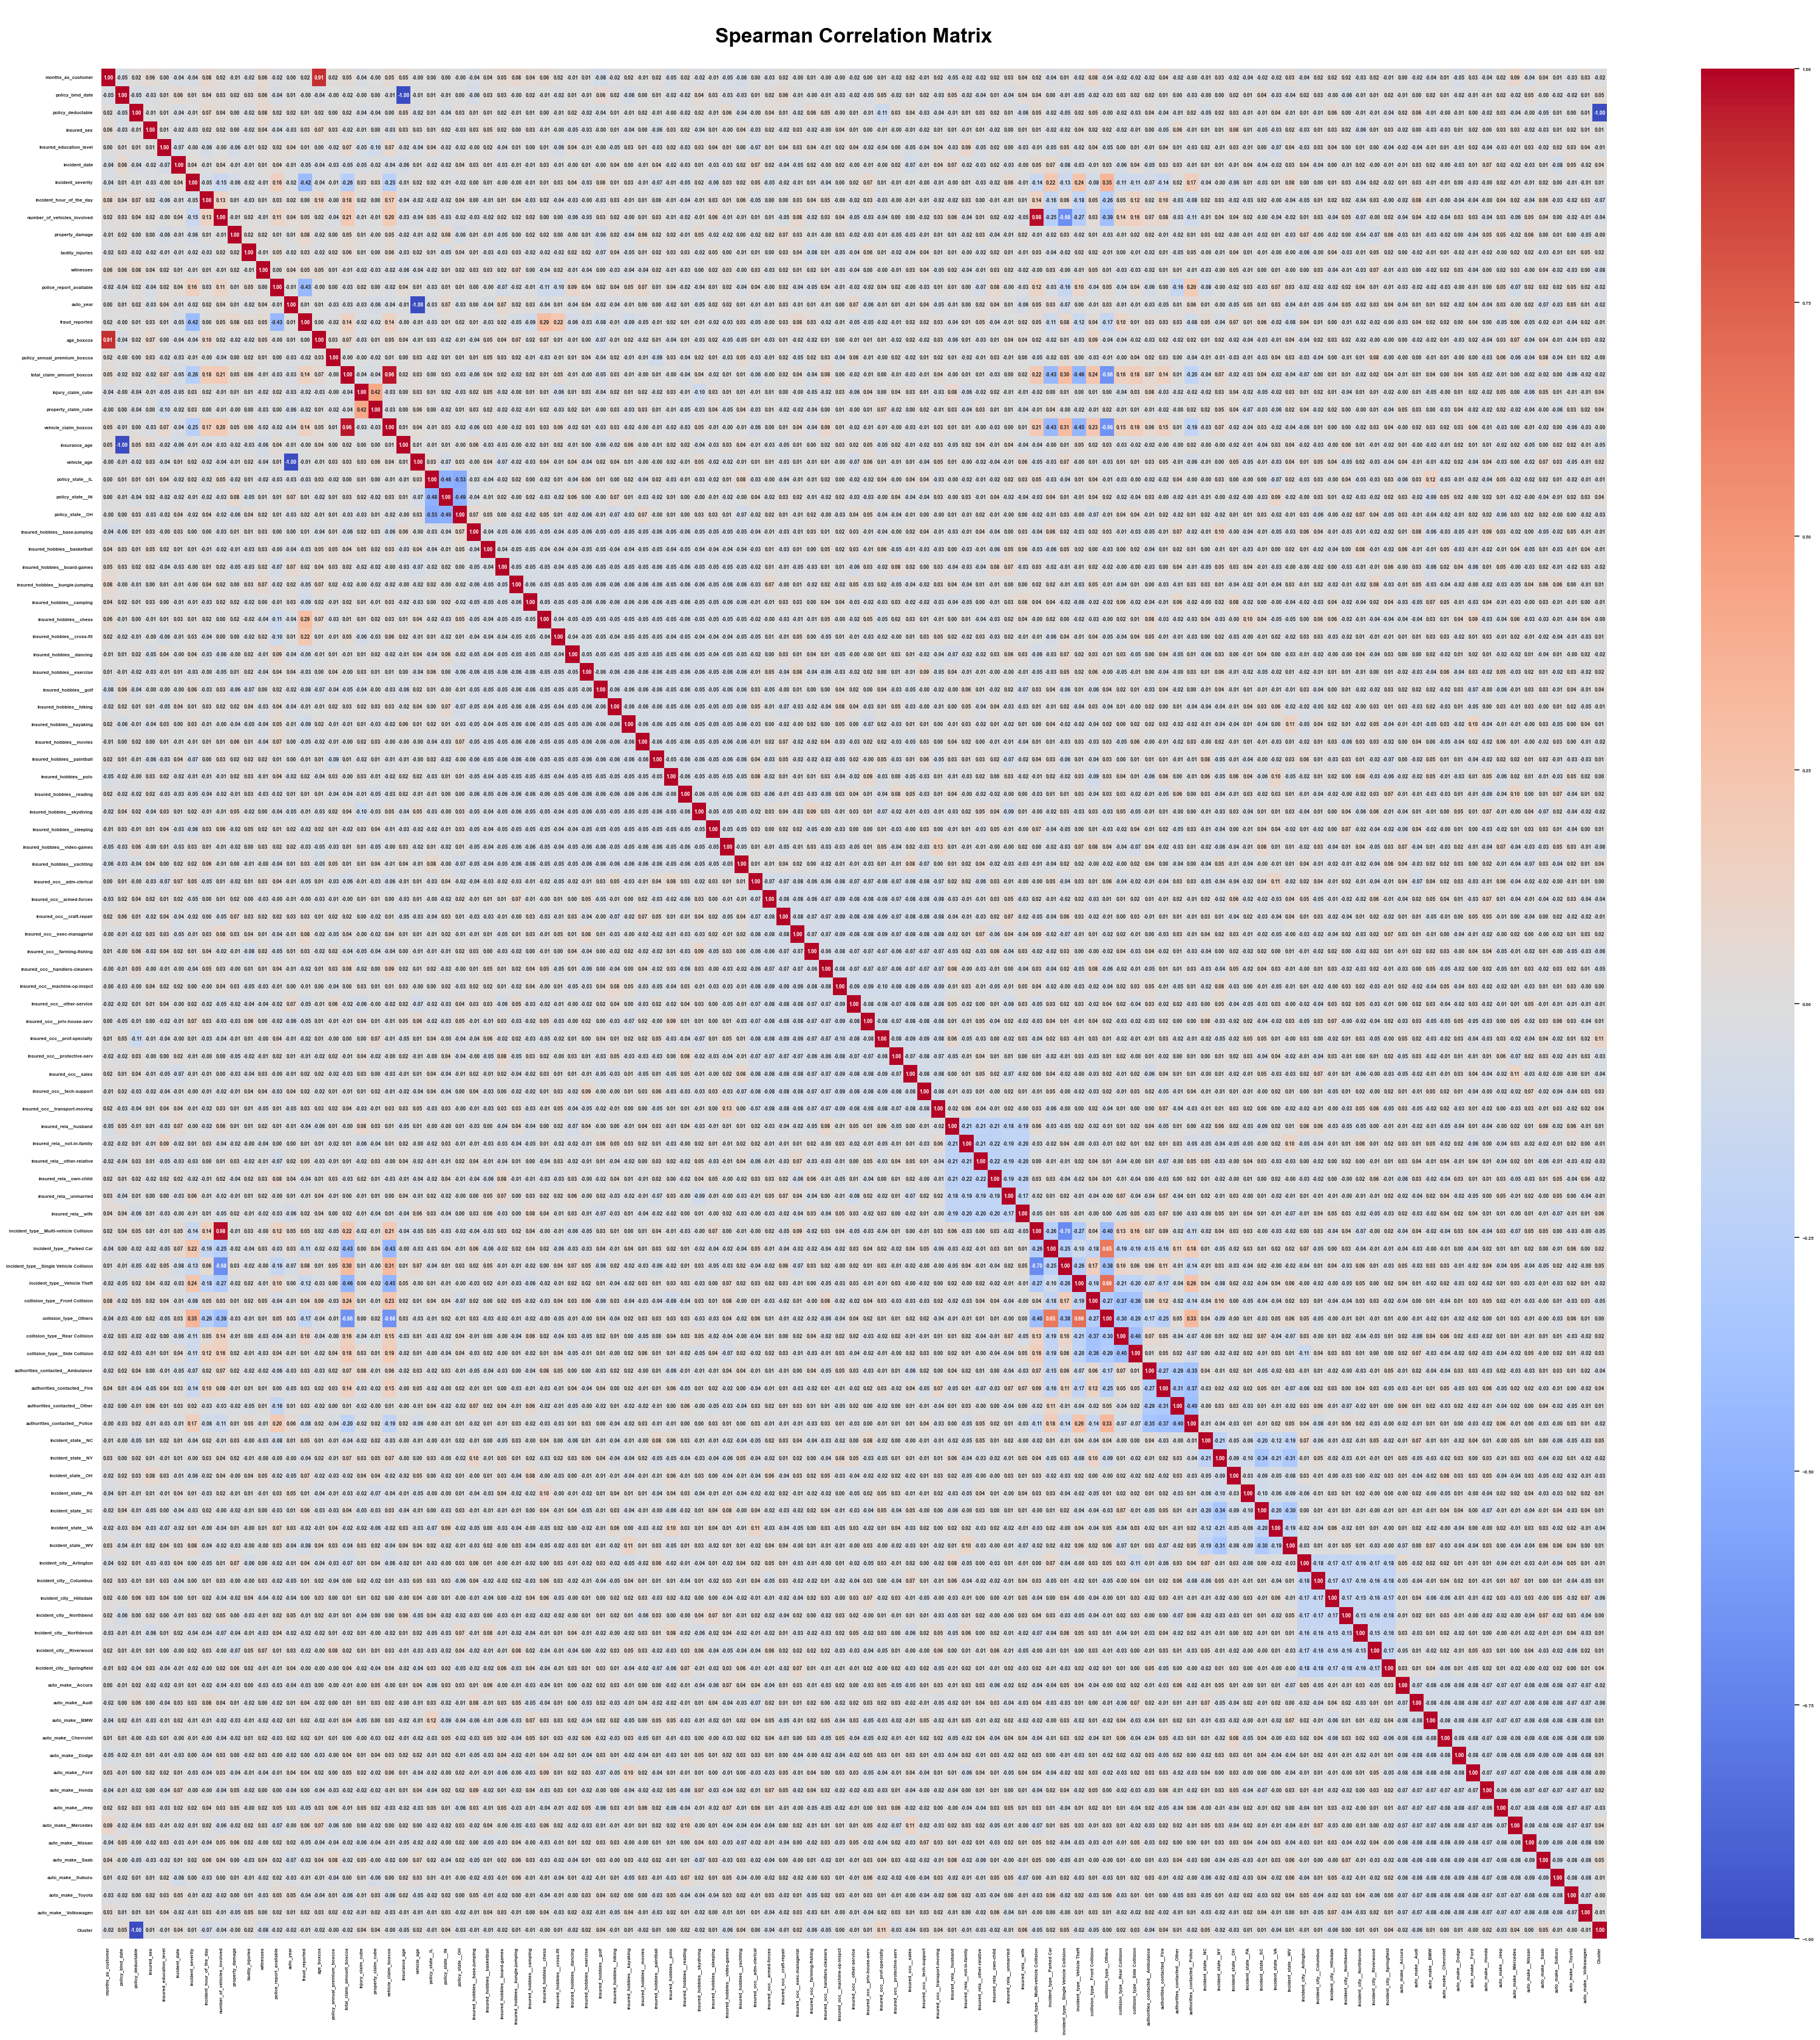

In [178]:
plt.figure(figsize=(40,40))
sns.set_theme(context='notebook', style='white', palette='dark', font='sans-serif', font_scale=.5, color_codes=True, rc=None)

cor_col = df1
correlation_matrix = cor_col.corr(method='spearman')
sns.heatmap(correlation_matrix,annot=True,fmt='.2f',cmap='coolwarm')
plt.title('\nSpearman Correlation Matrix\n',fontdict={'fontsize':24,'color':'black','fontweight':'bold'})

plt.show()
sns.set_theme(context='notebook', style='white', palette='dark', font='sans-serif', font_scale=1, color_codes=True, rc=None)


In [179]:
sns.set_theme(context='notebook', style='white', palette='dark', font='sans-serif', font_scale=1, color_codes=True, rc=None)

## <span style="color:Aqua;">Training all the model:</span>

#### <span style="color:Khaki;">Defing the function to train and evaluate the model:</span>

In [180]:
def evaluate_model(model, x_train, y_train, x_test, y_test, color_positive='\033[92m', reset_color='\033[0m'):
    model.fit(x_train, y_train)
    y_preds = model.predict(x_test)
    y_preds_train = model.predict(x_train)

    print(f'{color_positive}Accuracy Test {reset_color} - {accuracy_score(y_test, y_preds)}')
    print(f'{color_positive}Accuracy Train{reset_color} - {accuracy_score(y_train, y_preds_train)}\n')

    print(f'{color_positive}Precision Test {reset_color} - {precision_score(y_test, y_preds, average="weighted")}')
    print(f'{color_positive}Precision Train{reset_color} - {precision_score(y_train, y_preds_train, average="weighted")}\n')

    print(f'{color_positive}Recall Test {reset_color} - {recall_score(y_test, y_preds, average="weighted")}')
    print(f'{color_positive}Recall Train{reset_color} - {recall_score(y_train, y_preds_train, average="weighted")}\n')

    print(f'{color_positive}F1_score Test {reset_color} - {f1_score(y_test, y_preds, average="weighted")}')
    print(f'{color_positive}F1_score Train{reset_color} - {f1_score(y_train, y_preds_train, average="weighted")}\n')
    
    print(f"{color_positive}Confusion Matrix Test {reset_color} -- \n{confusion_matrix(y_test, y_preds)}")
    print(f'{color_positive}Confusion Matrix Train{reset_color} -- \n{confusion_matrix(y_train, y_preds_train)}\n')

    print(f'{color_positive}Classification Report Test{reset_color}\n{classification_report(y_test, y_preds)}')
    print(f'{color_positive}Classification Report Train{reset_color}\n{classification_report(y_train, y_preds_train)}')
    
    print(f'{color_positive}Balanced Accuracy Test {reset_color} - {balanced_accuracy_score(y_test, y_preds)}')
    print(f'{color_positive}Balanced Accuracy Train{reset_color} - {balanced_accuracy_score(y_train, y_preds_train)}\n')

    cm = confusion_matrix(y_test, y_preds)
    specificity = np.diag(cm) / np.sum(cm, axis=1)
    print(f'{color_positive}Specificity Test{reset_color} - {specificity.mean()}\n')

    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(x_test)[:, 1]  # Probability estimates for the positive class
        fpr, tpr, thresholds = roc_curve(y_test, y_proba)
        auc_score = roc_auc_score(y_test, y_proba)
        plt.figure()
        plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate (FPR)')
        plt.ylabel('True Positive Rate (TPR)')
        plt.title('ROC Curve for Logistic Regression')
        plt.legend(loc="lower right")
        plt.show()

    print('-'*40)

In [181]:
from sklearn.linear_model import LogisticRegression

In [182]:
x_train_scaled_df

age_boxcox  policy_annual_premium_boxcox  total_claim_amount_boxcox  \
0        0.3231                        0.3188                    -1.8698   
1       -0.9385                       -0.2973                     0.0085   
2       -1.0848                       -1.2197                     0.1074   
3       -2.6523                       -0.9300                     1.4665   
4       -0.0224                       -0.4694                     0.1417   
..          ...                           ...                        ...   
987     -1.3990                       -0.0619                    -0.2764   
988      0.6108                       -1.1262                     0.4176   
989     -0.2766                        0.6285                     0.0492   
990     -0.7015                       -1.4303                     0.5879   
991     -0.1481                        1.1953                     0.2885   

     injury_claim_cube  property_claim_cube  vehicle_claim_boxcox  \
0               0.9347              -0.7319               -1.8543   
1               1.0871               1.0311                0.1986   
2              -0.9381              -1.0119                0.3074   
3               1.1362               1.0806                1.3253   
4               0.8250               0.3101               -0.0549   
..                 ...                  ...                   ...   
987            -0.6513               1.5697               -0.2646   
988             1.1720              -0.6561                0.3918   
989             0.8242              -0.2222               -0.0910   
990             0.5930               1.5079                0.5482   
991             0.2178               0.1541                0.3244   

     insurance_age  vehicle_age  auto_year  policy_deductable  \
0          -1.6624      -1.3907     1.3907            -0.2941   
1          -0.4943      -0.1529     0.1529             1.4269   
2           0.0898       0.2008    -0.2008            -1.1545   
3          -1.5164      -1.2139     1.2139            -1.1545   
4          -0.3482       0.3776    -0.3776             1.4269   
..             ...          ...        ...                ...   
987        -1.4239       0.2437    -0.2437            -0.8606   
988         0.8177      -1.3643     1.3643             0.2324   
989        -0.9556      -0.8494     0.8494            -0.7586   
990        -1.3702      -1.1076     1.1076            -0.1212   
991         0.0491       1.5086    -1.5086            -0.8944   

     months_as_customer  insured_sex  insured_education_level  \
0              239.0000       0.0000                   3.0000   
1              108.0000       1.0000                   5.0000   
2              116.0000       1.0000                   3.0000   
3                8.0000       1.0000                   2.0000   
4              161.0000       1.0000                   6.0000   
..                  ...          ...                      ...   
987            125.2264       0.0000                   4.9753   
988            267.6441       0.4627                   4.3882   
989            186.7000       1.0000                   3.6994   
990            166.9549       0.4003                   4.7991   
991            169.5571       1.0000                   4.0930   

     incident_severity  incident_hour_of_the_day  number_of_vehicles_involved  \
0               3.0000                   22.0000                       1.0000   
1               2.0000                   14.0000                       1.0000   
2               0.0000                    8.0000                       3.0000   
3               0.0000                   21.0000                       1.0000   
4               2.0000                    0.0000                       3.0000   
..                 ...                       ...                          ...   
987             0.3416                   14.8766                       2.3169   
988             0.0000                    3.2236     

In [183]:
fea = ['age_boxcox', 'insurance_age', 'vehicle_age', 'auto_year','policy_deductable', 'insured_sex', 'incident_severity','number_of_vehicles_involved','property_damage', 'bodily_injuries',
       'policy_state__IL', 'policy_state__IN', 'policy_state__OH', 'insured_rela__husband', 'insured_rela__not-in-family', 'insured_rela__other-relative',  'insured_rela__own-child',
       'insured_rela__unmarried',	'insured_rela__wife',	'incident_type__Multi-vehicle Collision',	'incident_type__Parked Car',	'incident_type__Single Vehicle Collision',
       'incident_type__Vehicle Theft',	'collision_type__Front Collision',	'collision_type__Others',	'collision_type__Rear Collision',	'collision_type__Side Collision',	
       'incident_state__NC',	'incident_state__NY',	'incident_state__OH',	'incident_state__PA',	'incident_state__SC',	'incident_state__VA',	'incident_state__WV', 'incident_city__Arlington',
       'incident_city__Columbus',	'incident_city__Hillsdale',	'incident_city__Northbend',	'incident_city__Northbrook',	'incident_city__Riverwood',	'incident_city__Springfield',	'auto_make__Accura',
       'auto_make__Audi',	'auto_make__BMW',	'auto_make__Chevrolet',	'auto_make__Dodge',	'auto_make__Ford',	'auto_make__Honda',	'auto_make__Jeep',	'auto_make__Mercedes',	'auto_make__Nissan',
       'auto_make__Saab',	'auto_make__Suburu',	'auto_make__Toyota',	'auto_make__Volkswagen']

/run/media/E_Drive/Technology/Python Project/Capstone/Insurance_Analytics_Prediction/ins/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Test  - 0.83
Accuracy Train - 0.9092741935483871

Precision Test  - 0.8409329385486469
Precision Train - 0.910776938265964

Recall Test  - 0.83
Recall Train - 0.9092741935483871

F1_score Test  - 0.8337994612229427
F1_score Train - 0.9091911420678545

Confusion Matrix Test  -- 
[[188  32]
 [ 19  61]]
Confusion Matrix Train -- 
[[436  60]
 [ 30 466]]

Classification Report Test
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       220
           1       0.66      0.76      0.71        80

    accuracy                           0.83       300
   macro avg       0.78      0.81      0.79       300
weighted avg       0.84      0.83      0.83       300

Classification Report Train
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       496
           1       0.89      0.94      0.91       496

    accuracy                           0.91       992
   macro avg       0.91      0.91     

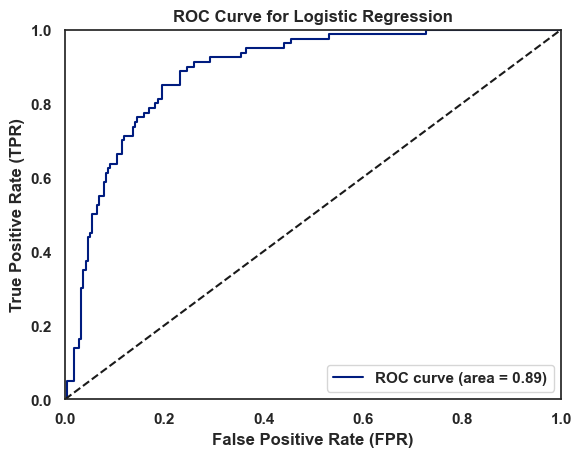

----------------------------------------


In [184]:
Linear_Model = LogisticRegression(random_state=42)
evaluate_model(Linear_Model, x_train_scaled_df, y_train, x_test_scaled_df, y_test)

Accuracy Test  - 0.8133333333333334
Accuracy Train - 1.0

Precision Test  - 0.8062542258282623
Precision Train - 1.0

Recall Test  - 0.8133333333333334
Recall Train - 1.0

F1_score Test  - 0.8082436418719605
F1_score Train - 1.0

Confusion Matrix Test  -- 
[[198  22]
 [ 34  46]]
Confusion Matrix Train -- 
[[496   0]
 [  0 496]]

Classification Report Test
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       220
           1       0.68      0.57      0.62        80

    accuracy                           0.81       300
   macro avg       0.76      0.74      0.75       300
weighted avg       0.81      0.81      0.81       300

Classification Report Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       496
           1       1.00      1.00      1.00       496

    accuracy                           1.00       992
   macro avg       1.00      1.00      1.00       992
weighted avg   

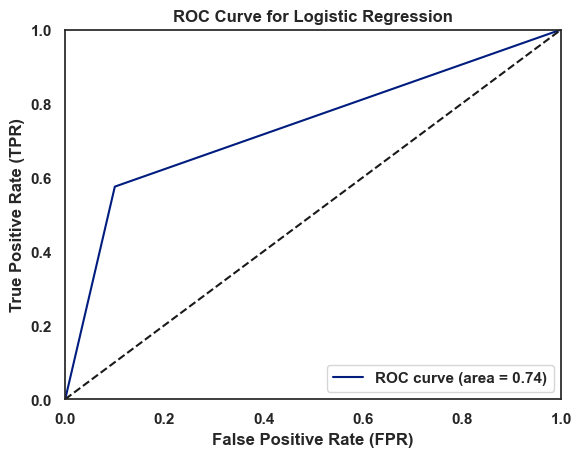

----------------------------------------


In [185]:
DT_Classifier = DecisionTreeClassifier(random_state=42)
evaluate_model(DT_Classifier, x_train_scaled_df, y_train, x_test_scaled_df, y_test)

                           Feature  Importance
13    policy_annual_premium_boxcox      0.3656
28          insured_hobbies__chess      0.1639
29      insured_hobbies__cross-fit      0.1266
19                     vehicle_age      0.1126
56   insured_occ__transport-moving      0.0161
..                             ...         ...
96                 auto_make__Jeep      0.0000
98               auto_make__Nissan      0.0000
100              auto_make__Suburu      0.0000
101              auto_make__Toyota      0.0000
103                        Cluster      0.0000

[104 rows x 2 columns]


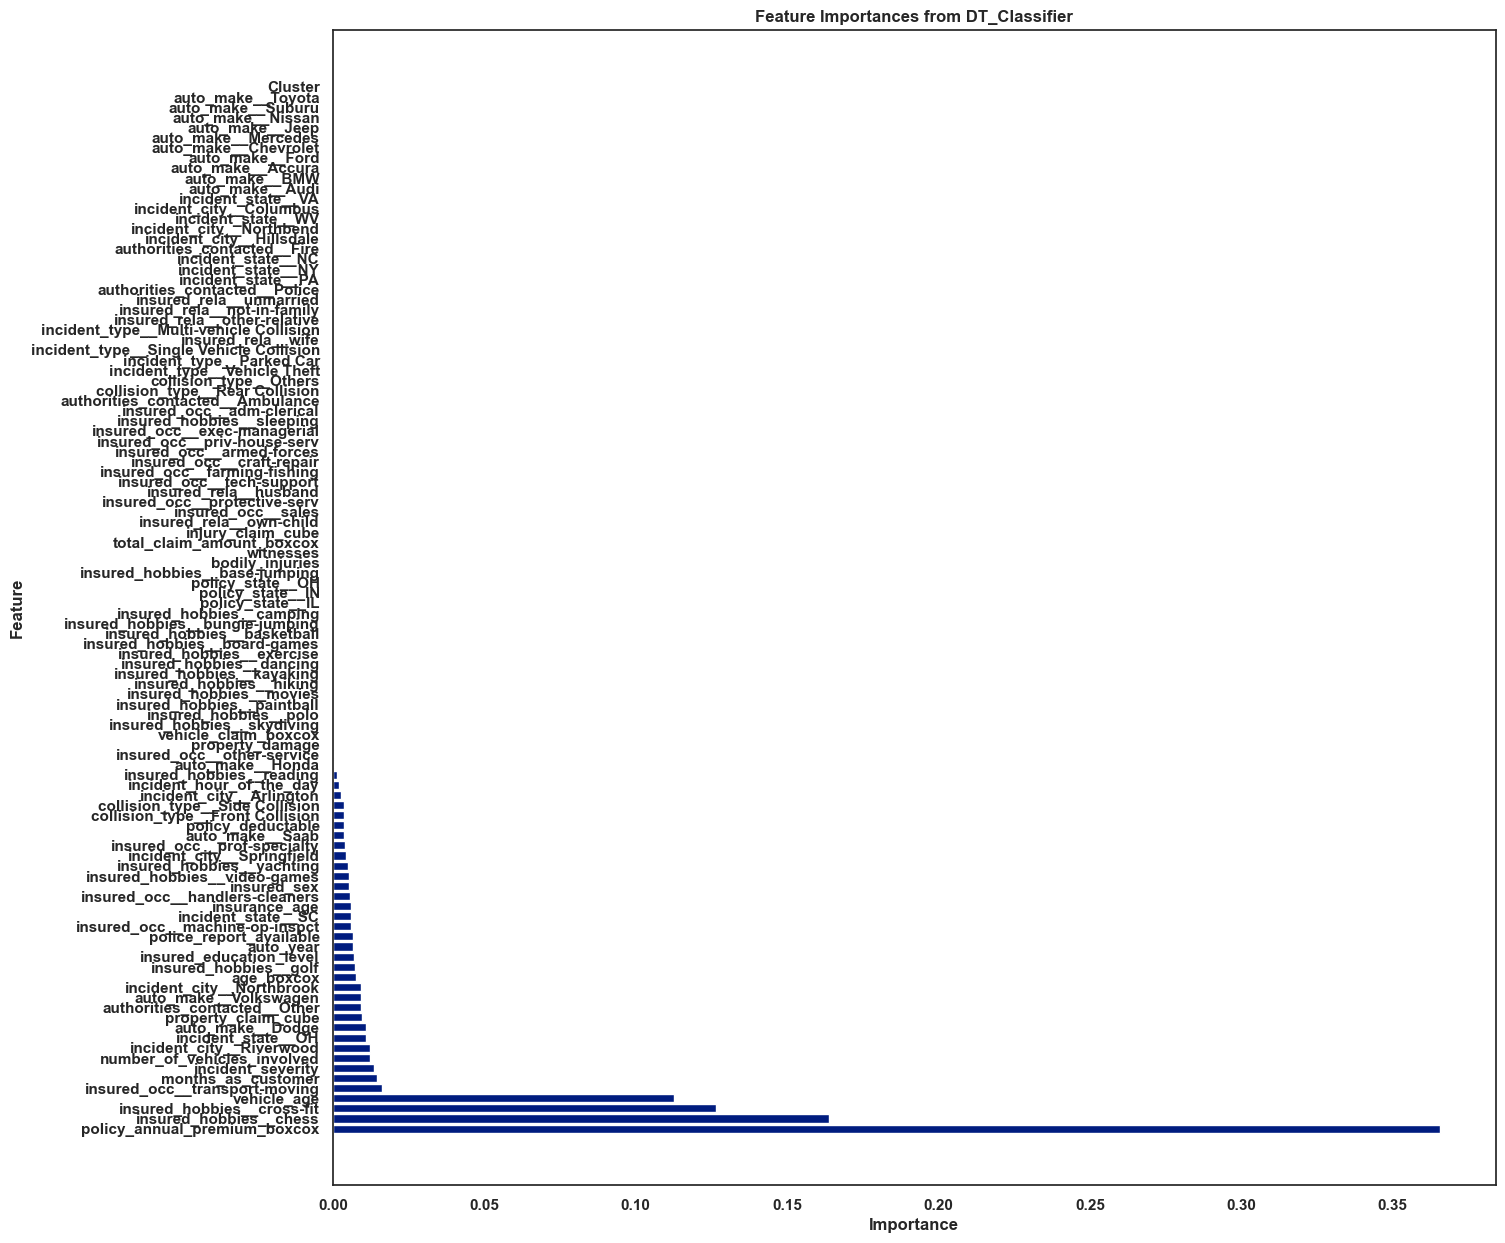

In [186]:
feature_importances = DT_Classifier.feature_importances_
# Map feature importances to feature names
feature_names =  x_train.columns
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

print(feature_importances_df)

# Plot feature importances
plt.figure(figsize=(15, 15))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from DT_Classifier')
plt.show()

Accuracy Test  - 0.8333333333333334
Accuracy Train - 1.0

Precision Test  - 0.8268930523028885
Precision Train - 1.0

Recall Test  - 0.8333333333333334
Recall Train - 1.0

F1_score Test  - 0.8229377958079784
F1_score Train - 1.0

Confusion Matrix Test  -- 
[[207  13]
 [ 37  43]]
Confusion Matrix Train -- 
[[496   0]
 [  0 496]]

Classification Report Test
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       220
           1       0.77      0.54      0.63        80

    accuracy                           0.83       300
   macro avg       0.81      0.74      0.76       300
weighted avg       0.83      0.83      0.82       300

Classification Report Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       496
           1       1.00      1.00      1.00       496

    accuracy                           1.00       992
   macro avg       1.00      1.00      1.00       992
weighted avg   

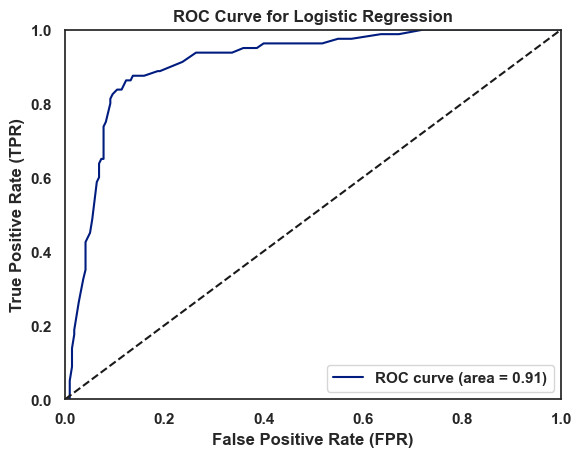

----------------------------------------


In [187]:
RF_Classifier = RandomForestClassifier(random_state=33,n_jobs=-1)
evaluate_model(RF_Classifier,  x_train_scaled_df, y_train, x_test_scaled_df, y_test)

                         Feature  Importance
13  policy_annual_premium_boxcox      0.1581
19                   vehicle_age      0.1001
28        insured_hobbies__chess      0.0439
29    insured_hobbies__cross-fit      0.0350
5       incident_hour_of_the_day      0.0259
..                           ...         ...
35       insured_hobbies__movies      0.0013
42     insured_hobbies__yachting      0.0012
25  insured_hobbies__board-games      0.0011
64     incident_type__Parked Car      0.0011
40     insured_hobbies__sleeping      0.0010

[104 rows x 2 columns]


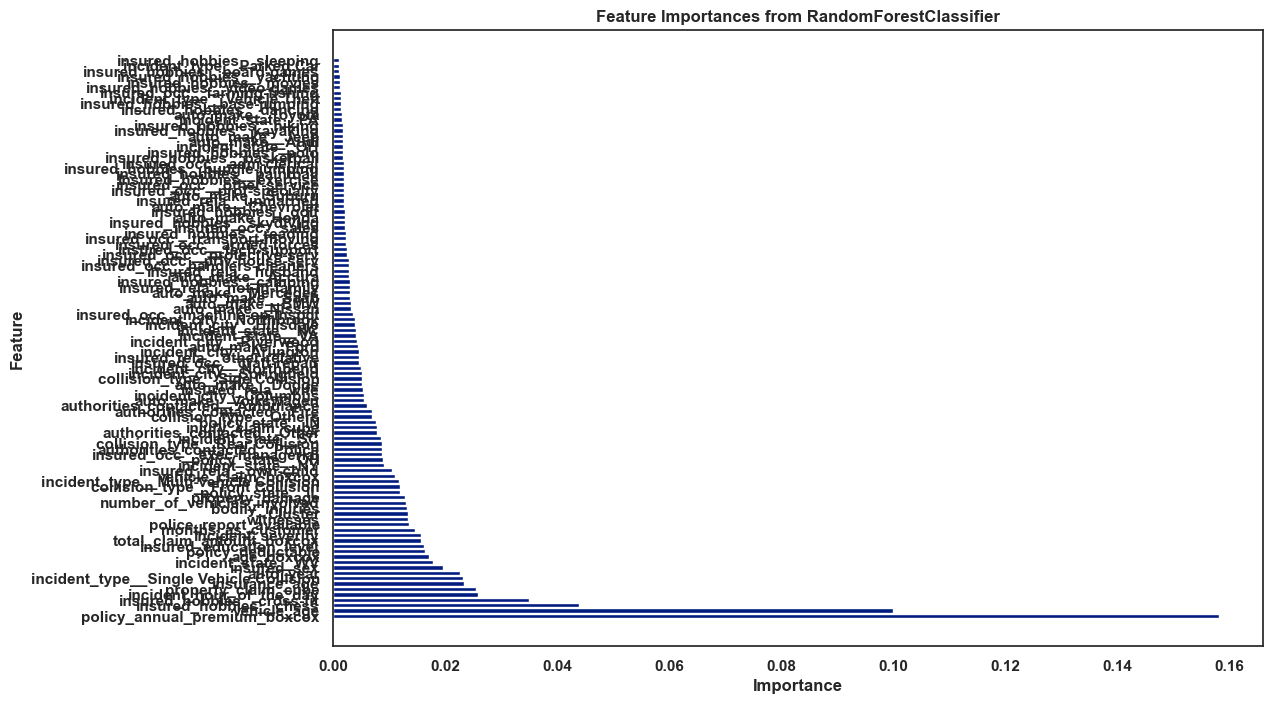

In [188]:
feature_importances = RF_Classifier.feature_importances_
# Map feature importances to feature names
feature_names =  x_train.columns
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

print(feature_importances_df)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from RandomForestClassifier')
plt.show()


Accuracy Test  - 0.8866666666666667
Accuracy Train - 0.9889112903225806

Precision Test  - 0.8858396858396858
Precision Train - 0.9889609782471716

Recall Test  - 0.8866666666666667
Recall Train - 0.9889112903225806

F1_score Test  - 0.8862057773450179
F1_score Train - 0.9889110086083985

Confusion Matrix Test  -- 
[[204  16]
 [ 18  62]]
Confusion Matrix Train -- 
[[493   3]
 [  8 488]]

Classification Report Test
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       220
           1       0.79      0.78      0.78        80

    accuracy                           0.89       300
   macro avg       0.86      0.85      0.85       300
weighted avg       0.89      0.89      0.89       300

Classification Report Train
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       496
           1       0.99      0.98      0.99       496

    accuracy                           0.99       992
   macro 

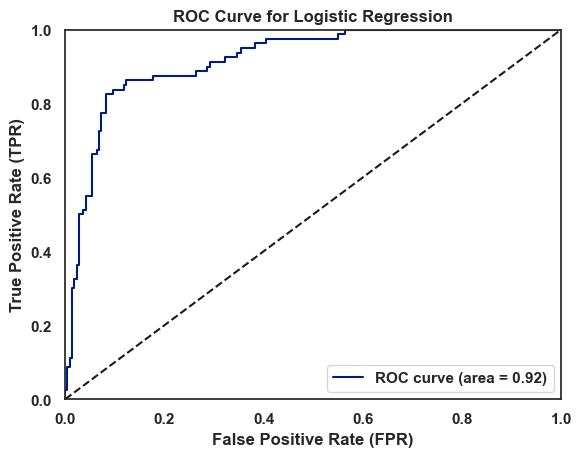

----------------------------------------


In [189]:
GB_Classifier = GradientBoostingClassifier(random_state=33)
evaluate_model(GB_Classifier, x_train_scaled_df, y_train, x_test_scaled_df, y_test)

                          Feature  Importance
13   policy_annual_premium_boxcox      0.3663
19                    vehicle_age      0.1866
28         insured_hobbies__chess      0.1665
29     insured_hobbies__cross-fit      0.1223
16            property_claim_cube      0.0121
..                            ...         ...
77             incident_state__OH      0.0000
80             incident_state__VA      0.0000
91                 auto_make__BMW      0.0000
96                auto_make__Jeep      0.0000
100             auto_make__Suburu      0.0000

[104 rows x 2 columns]


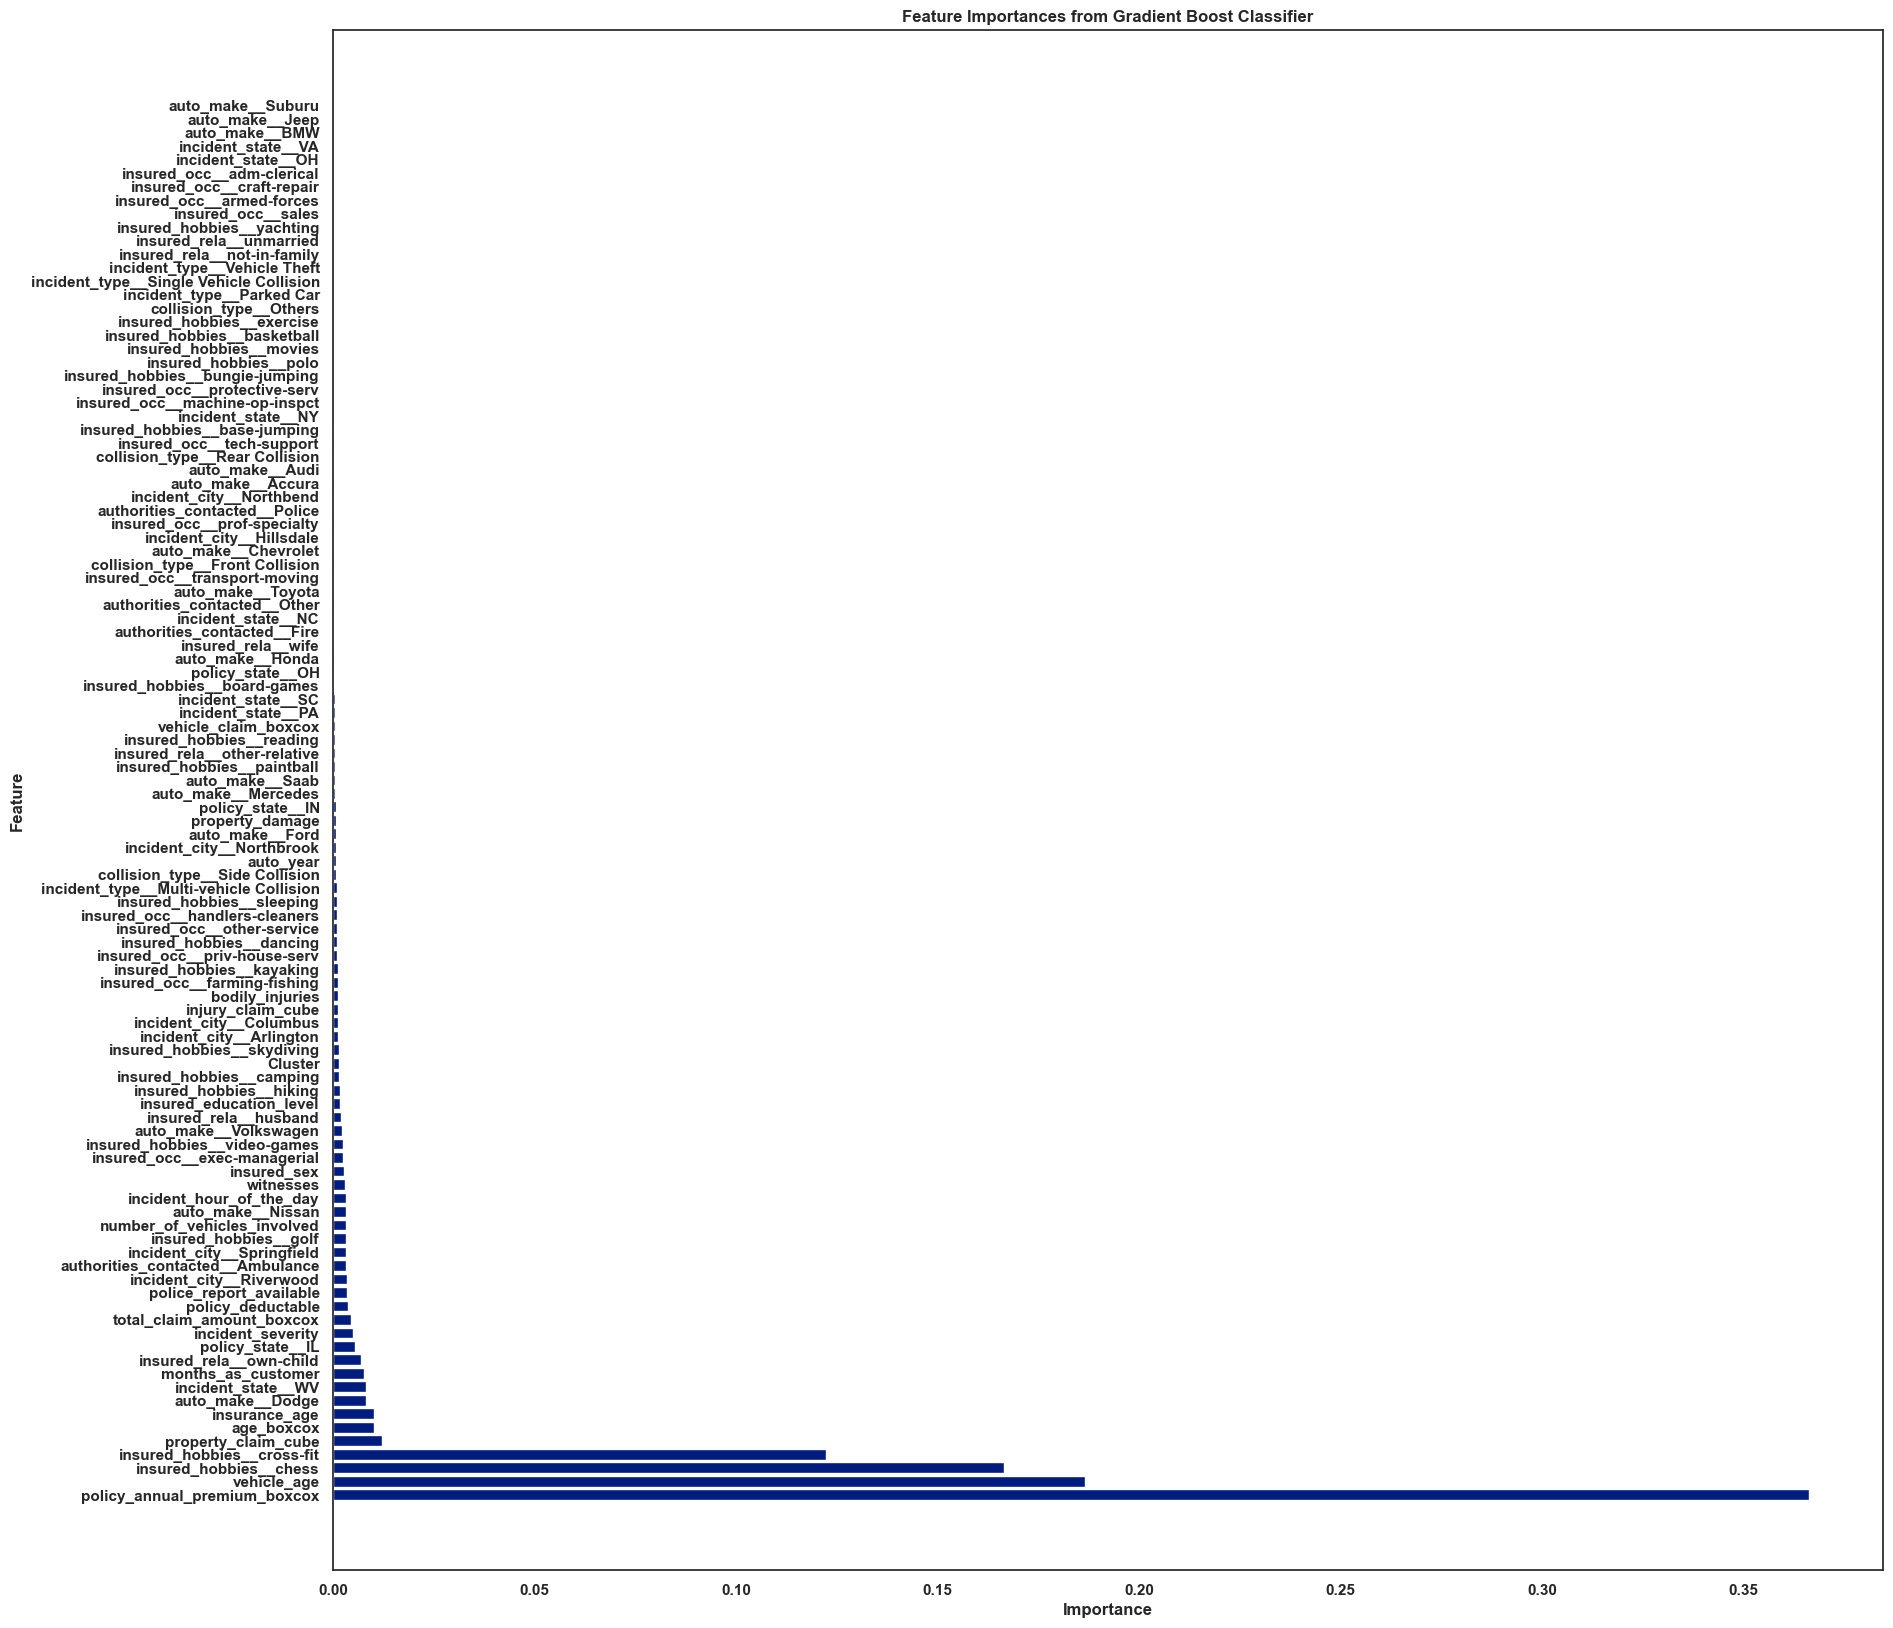

In [190]:
feature_importances = GB_Classifier.feature_importances_
# Map feature importances to feature names
feature_names =  x_train.columns
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

print(feature_importances_df)

# Plot feature importances
plt.figure(figsize=(20, 20))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Gradient Boost Classifier')
plt.show()


Accuracy Test  - 0.87
Accuracy Train - 1.0

Precision Test  - 0.868604041698212
Precision Train - 1.0

Recall Test  - 0.87
Recall Train - 1.0

F1_score Test  - 0.8691981423703468
F1_score Train - 1.0

Confusion Matrix Test  -- 
[[202  18]
 [ 21  59]]
Confusion Matrix Train -- 
[[496   0]
 [  0 496]]

Classification Report Test
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       220
           1       0.77      0.74      0.75        80

    accuracy                           0.87       300
   macro avg       0.84      0.83      0.83       300
weighted avg       0.87      0.87      0.87       300

Classification Report Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       496
           1       1.00      1.00      1.00       496

    accuracy                           1.00       992
   macro avg       1.00      1.00      1.00       992
weighted avg       1.00      1.00      1.00 

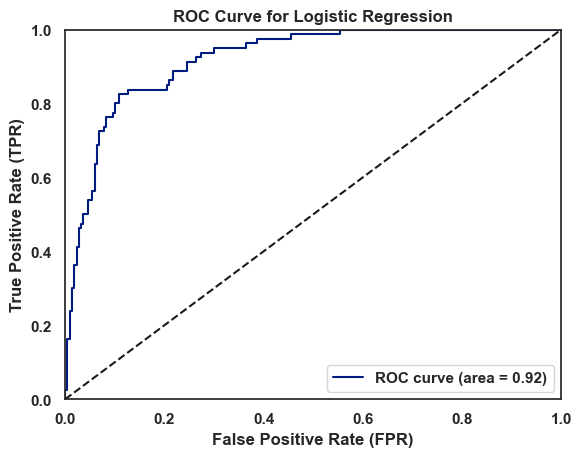

----------------------------------------


In [191]:
HGB_Classifier = HistGradientBoostingClassifier(random_state=33)
evaluate_model(HGB_Classifier, x_train_scaled_df, y_train, x_test_scaled_df, y_test)

Accuracy Test  - 0.8666666666666667
Accuracy Train - 1.0

Precision Test  - 0.8641074703021606
Precision Train - 1.0

Recall Test  - 0.8666666666666667
Recall Train - 1.0

F1_score Test  - 0.8649661250558112
F1_score Train - 1.0

Confusion Matrix Test  -- 
[[203  17]
 [ 23  57]]
Confusion Matrix Train -- 
[[496   0]
 [  0 496]]

Classification Report Test
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       220
           1       0.77      0.71      0.74        80

    accuracy                           0.87       300
   macro avg       0.83      0.82      0.83       300
weighted avg       0.86      0.87      0.86       300

Classification Report Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       496
           1       1.00      1.00      1.00       496

    accuracy                           1.00       992
   macro avg       1.00      1.00      1.00       992
weighted avg   

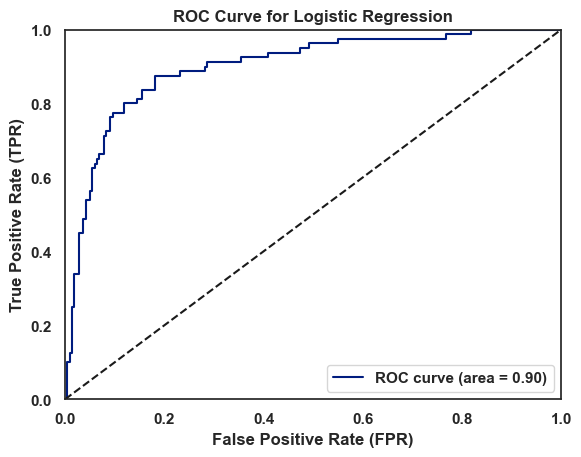

----------------------------------------


In [192]:
xgb_Classifier = xg.XGBClassifier(random_state=33)
evaluate_model(xgb_Classifier, x_train_scaled_df.values, y_train, x_test_scaled_df.values, y_test)

                          Feature  Importance
19                    vehicle_age      0.1756
28         insured_hobbies__chess      0.1182
13   policy_annual_premium_boxcox      0.0722
29     insured_hobbies__cross-fit      0.0685
93               auto_make__Dodge      0.0332
..                            ...         ...
90                auto_make__Audi      0.0000
96                auto_make__Jeep      0.0000
97            auto_make__Mercedes      0.0000
101             auto_make__Toyota      0.0000
100             auto_make__Suburu      0.0000

[104 rows x 2 columns]


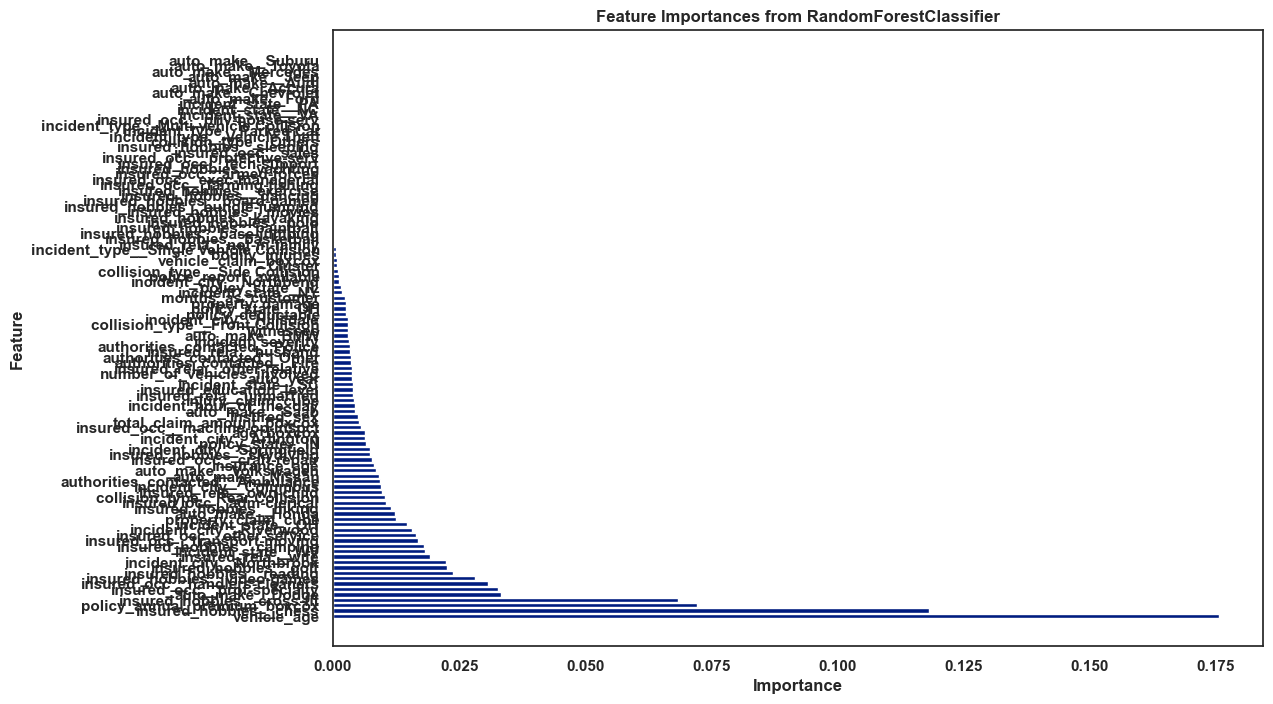

In [193]:
# Get feature importances
feature_importances = xgb_Classifier.feature_importances_

# Map feature importances to feature names
feature_names =  x_train.columns
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

print(feature_importances_df)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from RandomForestClassifier')
plt.show()

Accuracy Test  - 0.8566666666666667
Accuracy Train - 1.0

Precision Test  - 0.8529104250181683
Precision Train - 1.0

Recall Test  - 0.8566666666666667
Recall Train - 1.0

F1_score Test  - 0.8491039706195997
F1_score Train - 1.0

Confusion Matrix Test  -- 
[[209  11]
 [ 32  48]]
Confusion Matrix Train -- 
[[496   0]
 [  0 496]]

Classification Report Test
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       220
           1       0.81      0.60      0.69        80

    accuracy                           0.86       300
   macro avg       0.84      0.77      0.80       300
weighted avg       0.85      0.86      0.85       300

Classification Report Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       496
           1       1.00      1.00      1.00       496

    accuracy                           1.00       992
   macro avg       1.00      1.00      1.00       992
weighted avg   

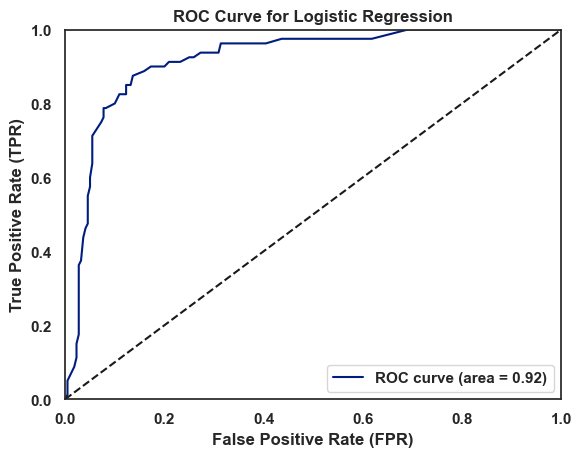

----------------------------------------


In [194]:
ET_Classifier =ExtraTreesClassifier(random_state=33,n_jobs=-1)
evaluate_model(ET_Classifier,  x_train_scaled_df, y_train, x_test_scaled_df, y_test)

                         Feature  Importance
19                   vehicle_age      0.1644
13  policy_annual_premium_boxcox      0.1214
28        insured_hobbies__chess      0.0431
29    insured_hobbies__cross-fit      0.0259
11                     auto_year      0.0174
..                           ...         ...
77            incident_state__OH      0.0022
78            incident_state__PA      0.0020
35       insured_hobbies__movies      0.0019
24   insured_hobbies__basketball      0.0018
37         insured_hobbies__polo      0.0017

[104 rows x 2 columns]


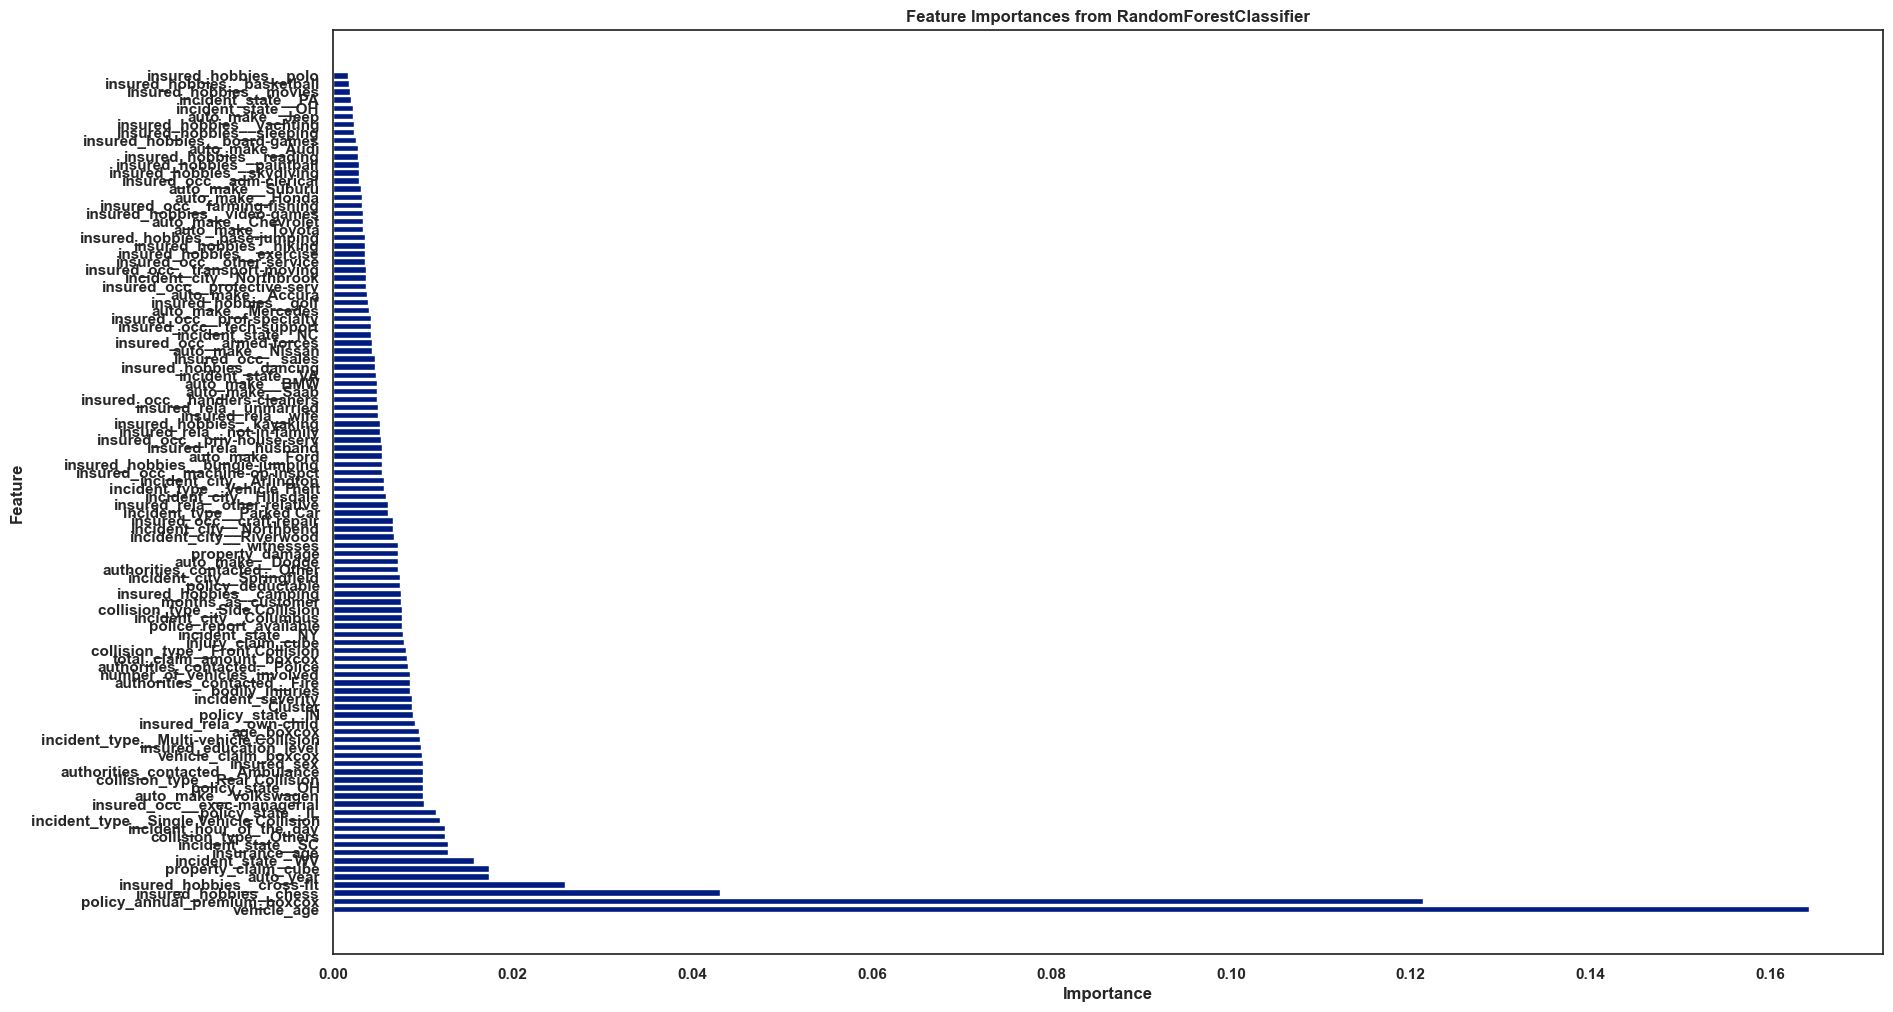

In [195]:
# Get feature importances
feature_importances = ET_Classifier.feature_importances_

# Map feature importances to feature names
feature_names =  x_train.columns
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

print(feature_importances_df)

# Plot feature importances
plt.figure(figsize=(20, 12))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from RandomForestClassifier')
plt.show()

Accuracy Test  - 0.89
Accuracy Train - 0.9475806451612904

Precision Test  - 0.8926402188782488
Precision Train - 0.9477626506612014

Recall Test  - 0.89
Recall Train - 0.9475806451612904

F1_score Test  - 0.8910344827586205
F1_score Train - 0.9475753177961795

Confusion Matrix Test  -- 
[[201  19]
 [ 14  66]]
Confusion Matrix Train -- 
[[465  31]
 [ 21 475]]

Classification Report Test
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       220
           1       0.78      0.82      0.80        80

    accuracy                           0.89       300
   macro avg       0.86      0.87      0.86       300
weighted avg       0.89      0.89      0.89       300

Classification Report Train
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       496
           1       0.94      0.96      0.95       496

    accuracy                           0.95       992
   macro avg       0.95      0.95    

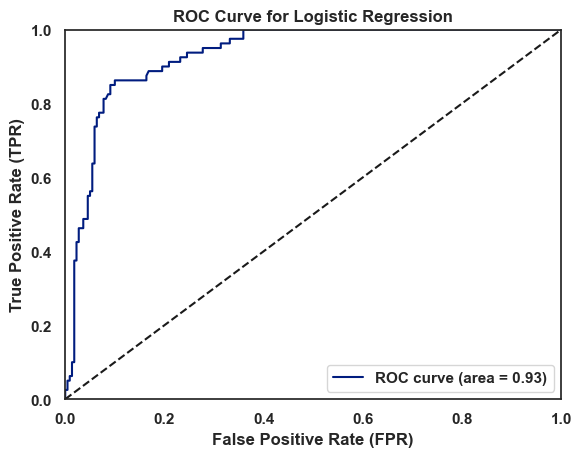

----------------------------------------


In [196]:
ADA_Classifier =AdaBoostClassifier(algorithm='SAMME',random_state=42,)
evaluate_model(ADA_Classifier,  x_train_scaled_df, y_train, x_test_scaled_df, y_test)


                          Feature  Importance
19                    vehicle_age      0.2044
13   policy_annual_premium_boxcox      0.1208
29     insured_hobbies__cross-fit      0.1046
28         insured_hobbies__chess      0.1037
12                     age_boxcox      0.0491
..                            ...         ...
99                auto_make__Saab      0.0000
100             auto_make__Suburu      0.0000
101             auto_make__Toyota      0.0000
102         auto_make__Volkswagen      0.0000
103                       Cluster      0.0000

[104 rows x 2 columns]


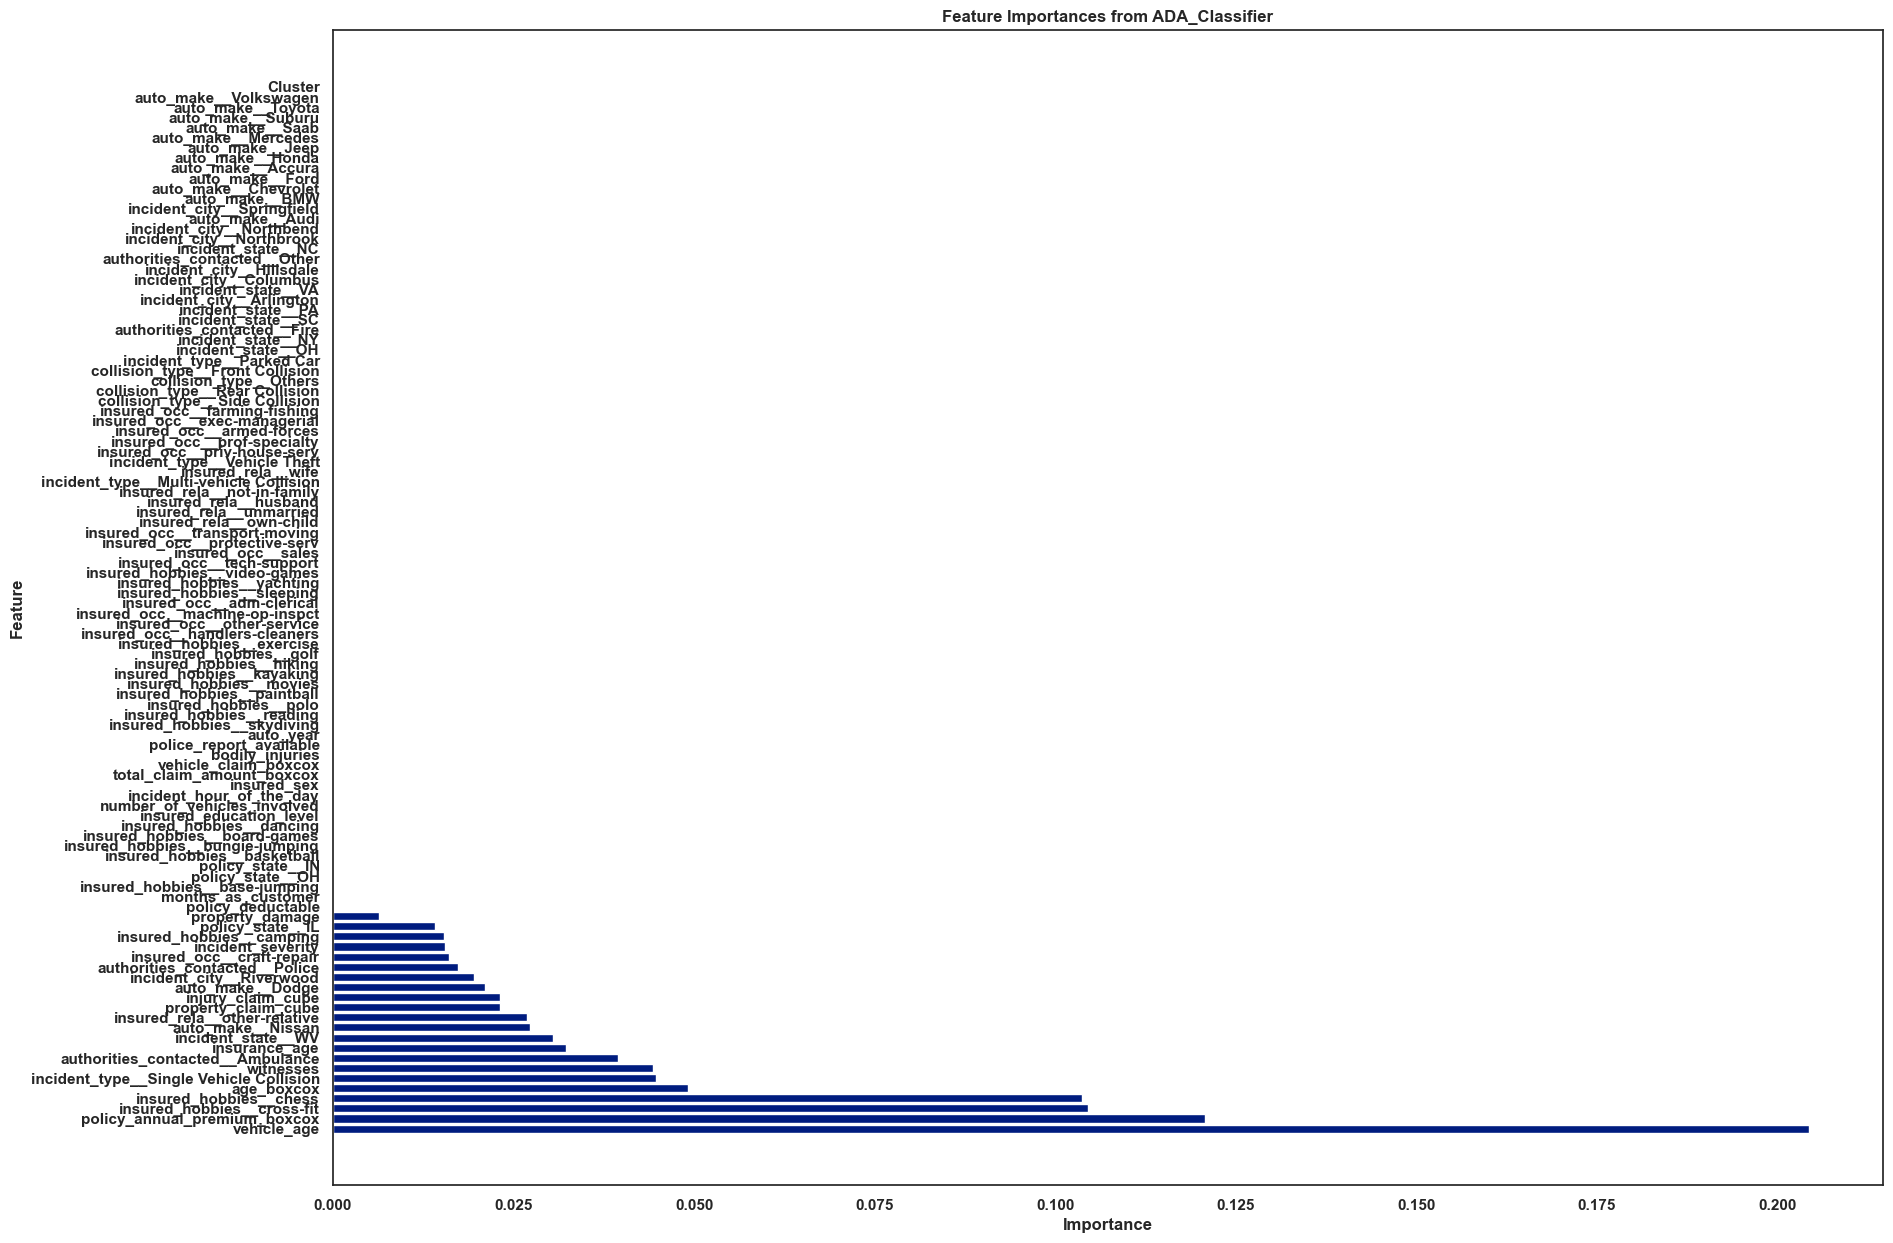

In [197]:
# Get feature importances
feature_importances = ADA_Classifier.feature_importances_

# Map feature importances to feature names
feature_names =  x_train.columns
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

print(feature_importances_df)

# Plot feature importances
plt.figure(figsize=(20, 15))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from ADA_Classifier')
plt.show()

Accuracy Test  - 0.88
Accuracy Train - 0.9919354838709677

Precision Test  - 0.88
Precision Train - 0.9919674796747968

Recall Test  - 0.88
Recall Train - 0.9919354838709677

F1_score Test  - 0.88
F1_score Train - 0.9919353527470205

Confusion Matrix Test  -- 
[[202  18]
 [ 18  62]]
Confusion Matrix Train -- 
[[494   2]
 [  6 490]]

Classification Report Test
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       220
           1       0.78      0.78      0.78        80

    accuracy                           0.88       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.88      0.88      0.88       300

Classification Report Train
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       496
           1       1.00      0.99      0.99       496

    accuracy                           0.99       992
   macro avg       0.99      0.99      0.99       992
weighted av

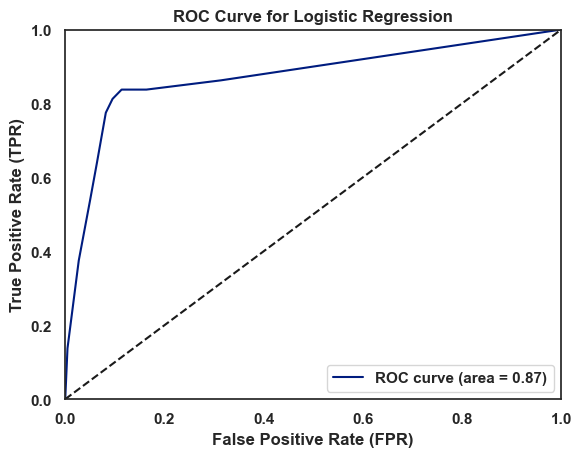

----------------------------------------


In [198]:
Bagging_Classifier = BaggingClassifier(n_jobs=-1,random_state=42,)
evaluate_model(Bagging_Classifier,  x_train_scaled_df, y_train, x_test_scaled_df, y_test)


In [199]:
params = {'n_neighbors' :range(1,30)}

KNN_grid_model = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=params, cv=3, scoring='accuracy',verbose=3, n_jobs=1,error_score='raise')

KNN_grid_model.fit(x_train_scaled_df,y_train)




Fitting 3 folds for each of 29 candidates, totalling 87 fits


[CV 1/3] END .....................n_neighbors=1;, score=0.574 total time=   0.1s
[CV 2/3] END .....................n_neighbors=1;, score=0.601 total time=   0.0s
[CV 3/3] END .....................n_neighbors=1;, score=0.609 total time=   0.0s
[CV 1/3] END .....................n_neighbors=2;, score=0.532 total time=   0.0s
[CV 2/3] END .....................n_neighbors=2;, score=0.583 total time=   0.0s
[CV 3/3] END .....................n_neighbors=2;, score=0.558 total time=   0.0s
[CV 1/3] END .....................n_neighbors=3;, score=0.553 total time=   0.0s
[CV 2/3] END .....................n_neighbors=3;, score=0.565 total time=   0.0s
[CV 3/3] END .....................n_neighbors=3;, score=0.564 total time=   0.0s
[CV 1/3] END .....................n_neighbors=4;, score=0.520 total time=   0.0s
[CV 2/3] END .....................n_neighbors=4;, score=0.562 total time=   0.0s
[CV 3/3] END .....................n_neighbors=4;, score=0.545 total time=   0.0s
[CV 1/3] END ...............

GridSearchCV(cv=3, error_score='raise', estimator=KNeighborsClassifier(),
             n_jobs=1, param_grid={'n_neighbors': range(1, 30)},
             scoring='accuracy', verbose=3)

In [200]:
KNN_grid_model.best_params_

{'n_neighbors': 1}

Accuracy Test  - 0.5033333333333333
Accuracy Train - 1.0

Precision Test  - 0.6596757154012218
Precision Train - 1.0

Recall Test  - 0.5033333333333333
Recall Train - 1.0

F1_score Test  - 0.5268338797442268
F1_score Train - 1.0

Confusion Matrix Test  -- 
[[ 97 123]
 [ 26  54]]
Confusion Matrix Train -- 
[[496   0]
 [  0 496]]

Classification Report Test
              precision    recall  f1-score   support

           0       0.79      0.44      0.57       220
           1       0.31      0.68      0.42        80

    accuracy                           0.50       300
   macro avg       0.55      0.56      0.49       300
weighted avg       0.66      0.50      0.53       300

Classification Report Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       496
           1       1.00      1.00      1.00       496

    accuracy                           1.00       992
   macro avg       1.00      1.00      1.00       992
weighted avg   

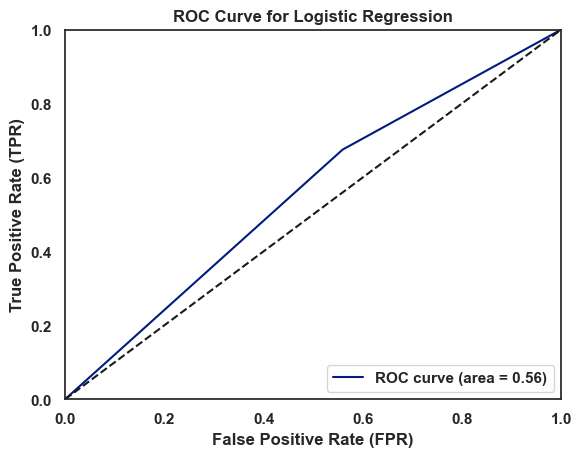

----------------------------------------


In [201]:
KN_Classifier = KNeighborsClassifier(n_neighbors=1,n_jobs=-1)
evaluate_model(KN_Classifier,  x_train_scaled_df, y_train, x_test_scaled_df, y_test)

In [202]:
params = {'learning_rate' :np.arange(0.1, .6, 0.01),
          'n_estimators' : range(1,100,10)
        
}

Ada_grid_model = GridSearchCV(estimator=AdaBoostClassifier(algorithm='SAMME',random_state=33), param_grid=params, cv=3, scoring='accuracy',verbose=3, n_jobs=1,error_score='raise')
Ada_grid_model.fit(x_train_scaled_df,y_train)

print(Ada_grid_model.best_params_,'\n',Ada_grid_model.best_score_)




Fitting 3 folds for each of 500 candidates, totalling 1500 fits
[CV 1/3] END .learning_rate=0.1, n_estimators=1;, score=0.773 total time=   0.0s
[CV 2/3] END .learning_rate=0.1, n_estimators=1;, score=0.810 total time=   0.0s
[CV 3/3] END .learning_rate=0.1, n_estimators=1;, score=0.809 total time=   0.0s
[CV 1/3] END learning_rate=0.1, n_estimators=11;, score=0.773 total time=   0.1s
[CV 2/3] END learning_rate=0.1, n_estimators=11;, score=0.710 total time=   0.1s
[CV 3/3] END learning_rate=0.1, n_estimators=11;, score=0.752 total time=   0.0s
[CV 1/3] END learning_rate=0.1, n_estimators=21;, score=0.864 total time=   0.1s
[CV 2/3] END learning_rate=0.1, n_estimators=21;, score=0.710 total time=   0.1s


[CV 3/3] END learning_rate=0.1, n_estimators=21;, score=0.752 total time=   0.1s
[CV 1/3] END learning_rate=0.1, n_estimators=31;, score=0.864 total time=   0.1s
[CV 2/3] END learning_rate=0.1, n_estimators=31;, score=0.710 total time=   0.2s
[CV 3/3] END learning_rate=0.1, n_estimators=31;, score=0.952 total time=   0.1s
[CV 1/3] END learning_rate=0.1, n_estimators=41;, score=0.864 total time=   0.1s
[CV 2/3] END learning_rate=0.1, n_estimators=41;, score=0.710 total time=   0.1s
[CV 3/3] END learning_rate=0.1, n_estimators=41;, score=0.952 total time=   0.1s
[CV 1/3] END learning_rate=0.1, n_estimators=51;, score=0.897 total time=   0.2s
[CV 2/3] END learning_rate=0.1, n_estimators=51;, score=0.940 total time=   0.2s
[CV 3/3] END learning_rate=0.1, n_estimators=51;, score=0.952 total time=   0.2s
[CV 1/3] END learning_rate=0.1, n_estimators=61;, score=0.894 total time=   0.2s
[CV 2/3] END learning_rate=0.1, n_estimators=61;, score=0.940 total time=   0.2s
[CV 3/3] END learning_rate=0

Accuracy Test  - 0.9033333333333333
Accuracy Train - 0.9395161290322581

Precision Test  - 0.905736434108527
Precision Train - 0.9397735407041062

Recall Test  - 0.9033333333333333
Recall Train - 0.9395161290322581

F1_score Test  - 0.9042424242424242
F1_score Train - 0.9395072770143915

Confusion Matrix Test  -- 
[[203  17]
 [ 12  68]]
Confusion Matrix Train -- 
[[460  36]
 [ 24 472]]

Classification Report Test
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       220
           1       0.80      0.85      0.82        80

    accuracy                           0.90       300
   macro avg       0.87      0.89      0.88       300
weighted avg       0.91      0.90      0.90       300

Classification Report Train
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       496
           1       0.93      0.95      0.94       496

    accuracy                           0.94       992
   macro a

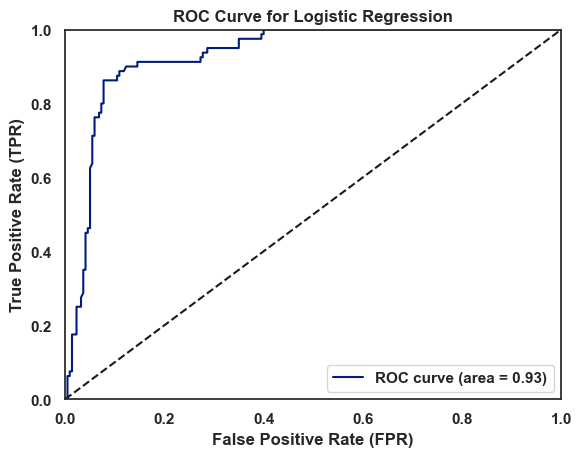

----------------------------------------


In [203]:
ADA_Classifier = AdaBoostClassifier(n_estimators=71,algorithm='SAMME',learning_rate=.5,random_state=33)
evaluate_model(ADA_Classifier,  x_train_scaled_df.drop(columns=['total_claim_amount_boxcox', 'injury_claim_cube','property_claim_cube','vehicle_claim_boxcox']), y_train, x_test_scaled_df.drop(columns=['total_claim_amount_boxcox', 'injury_claim_cube','property_claim_cube','vehicle_claim_boxcox']), y_test)

In [204]:
kf=KFold(n_splits=10,shuffle=True,random_state=42)
RF_cv_score = cross_val_score(ADA_Classifier,x_train_scaled_df,y_train, cv=kf)
print(f'Cross validations scores \n\n {RF_cv_score}\n\n')
print(f'Cross validations scores mean \n\n {np.mean(RF_cv_score)}')

Cross validations scores 

 [0.91       0.89       0.93939394 0.94949495 0.92929293 0.91919192
 0.91919192 0.95959596 0.95959596 0.95959596]


Cross validations scores mean 

 0.9335353535353537


In [59]:
os.makedirs('pkls', exist_ok=True)
with open(r'pkls/ADA_Classifier.pkl', 'wb') as f:
    pickle.dump(ADA_Classifier,f)

In [1]:
ADA_Classifier = AdaBoostClassifier(n_estimators=71,algorithm='SAMME',learning_rate=.5,random_state=33)
evaluate_model(ADA_Classifier,  x_train_scaled_df.drop(columns=['Cluster','total_claim_amount_boxcox', 'injury_claim_cube','property_claim_cube','vehicle_claim_boxcox']), y_train, x_test_scaled_df.drop(columns=['Cluster','total_claim_amount_boxcox', 'injury_claim_cube','property_claim_cube','vehicle_claim_boxcox']), y_test)

NameError: name 'AdaBoostClassifier' is not defined

fea1=['age_boxcox',
 'policy_annual_premium_boxcox',
 'insured_hobbies__base-jumping',
 'insured_hobbies__basketball',
 'insured_hobbies__board-games',
 'insured_hobbies__bungie-jumping',
 'insured_hobbies__camping',
 'insured_hobbies__chess',
 'insured_hobbies__cross-fit',
 'insured_hobbies__dancing',
 'insured_hobbies__exercise',
 'insured_hobbies__golf',
 'insured_hobbies__hiking',
 'insured_hobbies__kayaking',
 'insured_hobbies__movies',
 'insured_hobbies__paintball',
 'insured_hobbies__polo',
 'insured_hobbies__reading',
 'insured_hobbies__skydiving',
 'insured_hobbies__sleeping',
 'insured_hobbies__video-games',
 'insured_hobbies__yachting',
 'incident_type__Multi-vehicle Collision',
 'incident_type__Parked Car',
 'incident_type__Single Vehicle Collision',
 'incident_type__Vehicle Theft',
 'collision_type__Front Collision',
 'collision_type__Others',
 'collision_type__Rear Collision',
 'collision_type__Side Collision',
 'authorities_contacted__Ambulance',
 'authorities_contacted__Fire',
 'authorities_contacted__Other',
 'authorities_contacted__Police','insurance_age',
 'incident_state__NC',
 'incident_state__NY',
 'incident_state__OH',
 'incident_state__PA',
 'incident_state__SC',
 'incident_state__VA',
 'incident_state__WV',
 'auto_make__Accura',
 'auto_make__Audi',
 'auto_make__BMW',
 'auto_make__Chevrolet',
 'auto_make__Dodge',
 'auto_make__Ford',
 'auto_make__Honda',
 'auto_make__Jeep',
 'auto_make__Mercedes',
 'auto_make__Nissan',
 'auto_make__Saab',
 'auto_make__Suburu',
 'auto_make__Toyota',
 'auto_make__Volkswagen',
 'insured_rela__husband',
 'insured_rela__not-in-family',
 'insured_rela__other-relative',
 'insured_rela__own-child',
 'insured_rela__unmarried',
 'insured_rela__wife', 'property_damage',
 'incident_city__Arlington',
 'incident_city__Columbus',
 'incident_city__Hillsdale',
 'incident_city__Northbend',
 'incident_city__Northbrook',
 'incident_city__Riverwood',
 'incident_city__Springfield',
 'insured_occ__adm-clerical',
 'insured_occ__armed-forces',
 'insured_occ__craft-repair',
 'insured_occ__exec-managerial',
 'insured_occ__farming-fishing',
 'insured_occ__handlers-cleaners',
 'insured_occ__machine-op-inspct',
 'insured_occ__other-service',
 'insured_occ__priv-house-serv',
 'insured_occ__prof-specialty',
 'insured_occ__protective-serv',
 'insured_occ__sales',
 'insured_occ__tech-support',
 'insured_occ__transport-moving',]

In [62]:
list(x_train_scaled_df.columns)

['age_boxcox',
 'policy_annual_premium_boxcox',
 'total_claim_amount_boxcox',
 'injury_claim_cube',
 'property_claim_cube',
 'vehicle_claim_boxcox',
 'insurance_age',
 'vehicle_age',
 'auto_year',
 'policy_deductable',
 'months_as_customer',
 'insured_sex',
 'insured_education_level',
 'incident_severity',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'property_damage',
 'bodily_injuries',
 'witnesses',
 'police_report_available',
 'policy_state__IL',
 'policy_state__IN',
 'policy_state__OH',
 'insured_hobbies__base-jumping',
 'insured_hobbies__basketball',
 'insured_hobbies__board-games',
 'insured_hobbies__bungie-jumping',
 'insured_hobbies__camping',
 'insured_hobbies__chess',
 'insured_hobbies__cross-fit',
 'insured_hobbies__dancing',
 'insured_hobbies__exercise',
 'insured_hobbies__golf',
 'insured_hobbies__hiking',
 'insured_hobbies__kayaking',
 'insured_hobbies__movies',
 'insured_hobbies__paintball',
 'insured_hobbies__polo',
 'insured_hobbies__reading',
 'insur